In [1]:
from os import listdir
from os.path import isfile, join
from utils.tools import *

In [2]:
def full_graphing(path, lst = None):
    bad_mpts = []
    if not lst:
        path_files = [f for f in listdir(path) if isfile(join(path, f)) if f[-3:] == 'mpt']
        for i in path_files:
            try:
                print(i, ' was a permissible file')
                ex_mpt = mpt_data(path,[i])
                masked_mpt = mpt_data(path,[i], mask = ex_mpt.masker())
                masked_mpt.set_new_gph_dims(30,30)
                masked_mpt.mpt_plot()
            except ValueError:
                bad_mpts.append(i)
                print(i, ' was a bad file, could not find a mask')
        if bad_mpts:
            print(bad_mpts, " are a list of bad mpts. You may want to take a closer look at them")
    if type(lst) == list:
        for i in lst:
            try:
                print(i, ' was a permissible file')
                ex_mpt = mpt_data(path,[i])
                masked_mpt = mpt_data(path,[i], mask = ex_mpt.masker())
                masked_mpt.set_new_gph_dims(30,30)
                masked_mpt.mpt_plot()
            except ValueError:
                bad_mpts.append(i)
                print(i, ' was a bad file, could not find a mask')
            if bad_mpts:
                print(bad_mpts, " are a list of bad mpts. You may want to take a closer look at them")

In [3]:
path=r"C:\Users\cjang\Desktop\impedance_data\data\\"
good_graphs = ['DE_49_7_30.mpt', 'DE_49_8_30.mpt', 'DE_49_9_30.mpt']
#[f for f in listdir(path) if isfile(join(path, f)) if f[-3:] == 'mpt']

C:\Users\cjang\Desktop\impedance_data\python_notebooks\utils\tools.py:2113: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  c = c.ix[c[cols] > 0]
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


DE_40_10_60.mpt  was a permissible file
DE_40_11_60.mpt  was a permissible file
DE_40_12_60.mpt  was a permissible file
DE_40_13_60.mpt  was a permissible file
DE_40_14_60.mpt  was a permissible file
DE_40_14_60.mpt  was a bad file, could not find a mask
DE_40_15_60.mpt  was a permissible file


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


DE_40_1_30.mpt  was a permissible file
DE_40_2_60.mpt  was a permissible file
DE_40_3_60.mpt  was a permissible file
DE_40_4_60.mpt  was a permissible file
DE_40_5_60.mpt  was a permissible file


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


DE_40_6_60.mpt  was a permissible file
DE_40_7_60.mpt  was a permissible file
DE_40_8_60.mpt  was a permissible file
DE_40_8_60.mpt  was a bad file, could not find a mask
DE_40_9_60.mpt  was a permissible file
DE_49_1_30.mpt  was a permissible file
DE_49_2_30.mpt  was a permissible file
DE_49_2_30.mpt  was a bad file, could not find a mask
DE_49_3_30.mpt  was a permissible file
DE_49_3_30.mpt  was a bad file, could not find a mask
DE_49_4_30.mpt  was a permissible file


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


DE_49_4_30.mpt  was a bad file, could not find a mask
DE_49_5_30.mpt  was a permissible file
DE_49_6_30.mpt  was a permissible file
DE_49_7_30.mpt  was a permissible file
DE_49_8_30.mpt  was a permissible file
DE_49_9_30.mpt  was a permissible file
['DE_40_14_60.mpt', 'DE_40_8_60.mpt', 'DE_49_2_30.mpt', 'DE_49_3_30.mpt', 'DE_49_4_30.mpt']  are a list of bad mpts. You may want to take a closer look at them


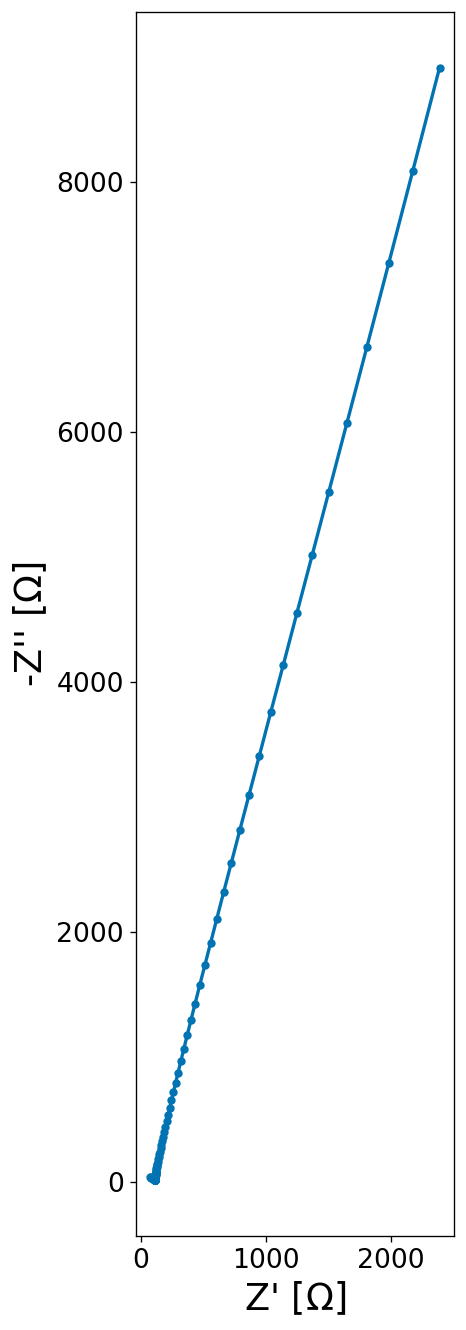

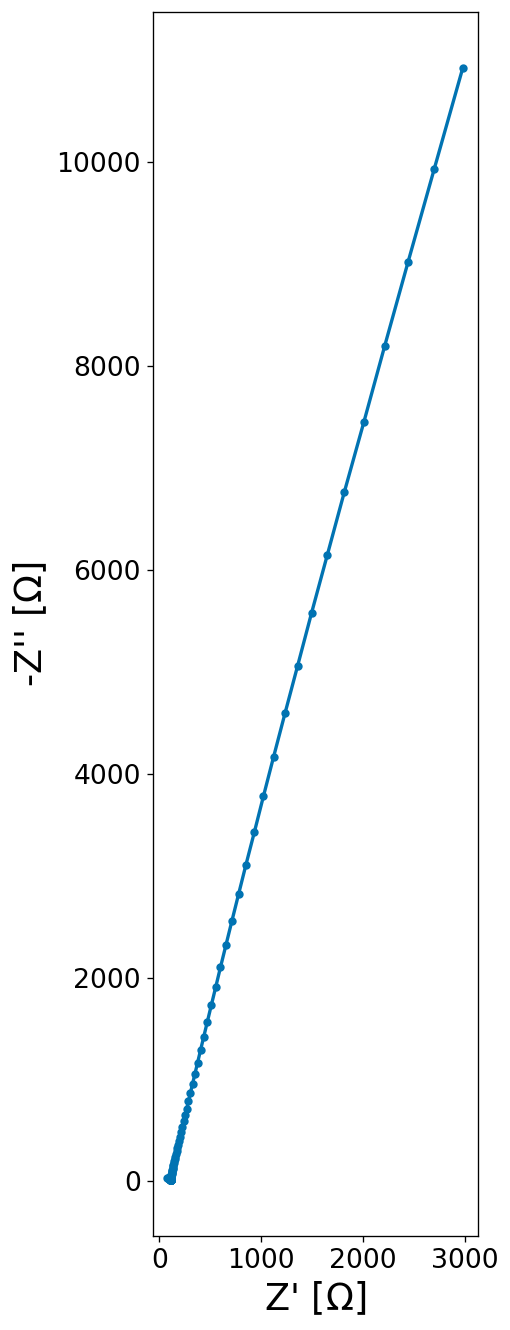

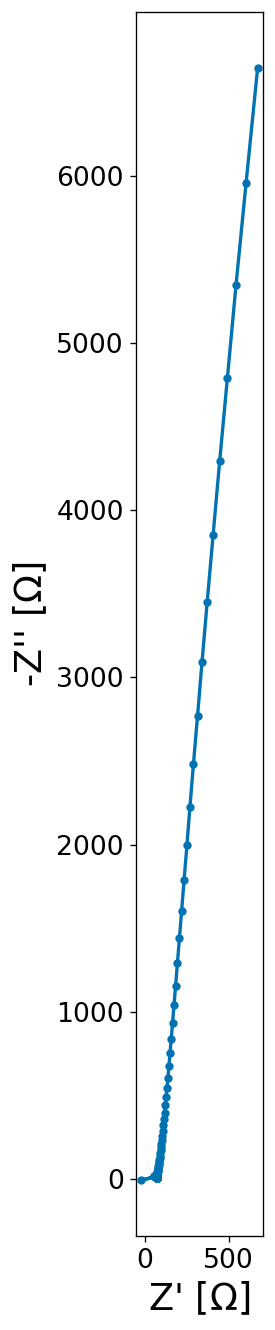

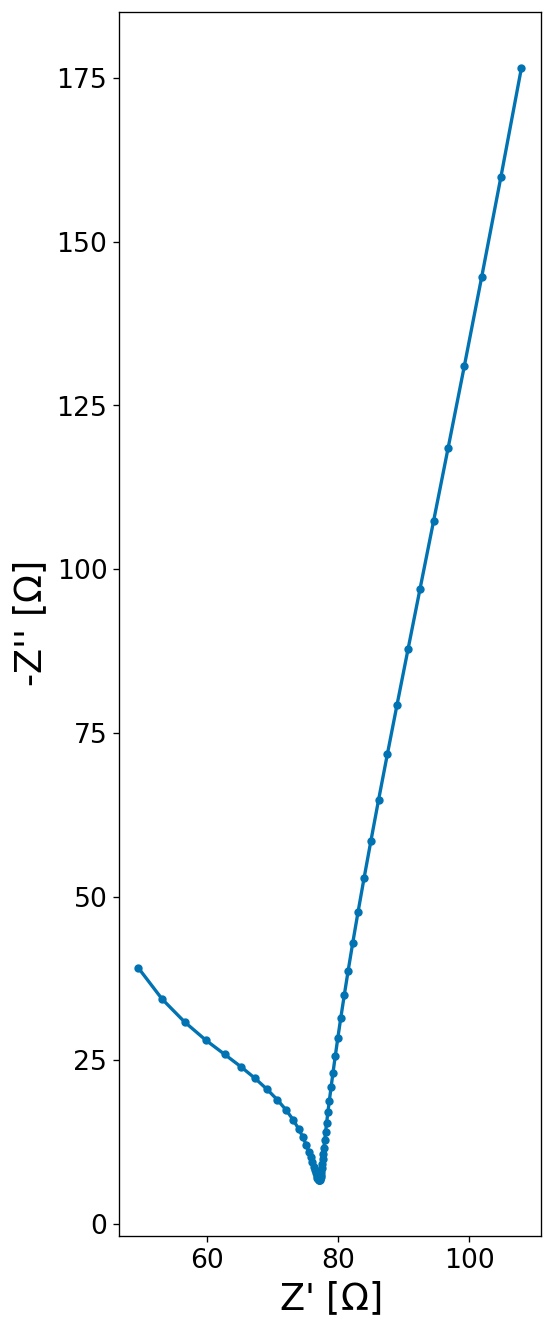

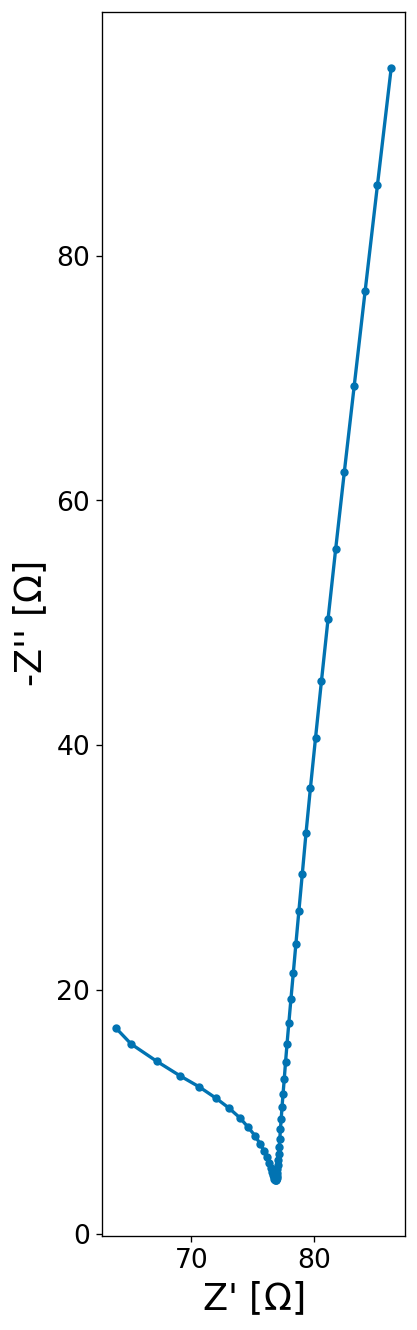

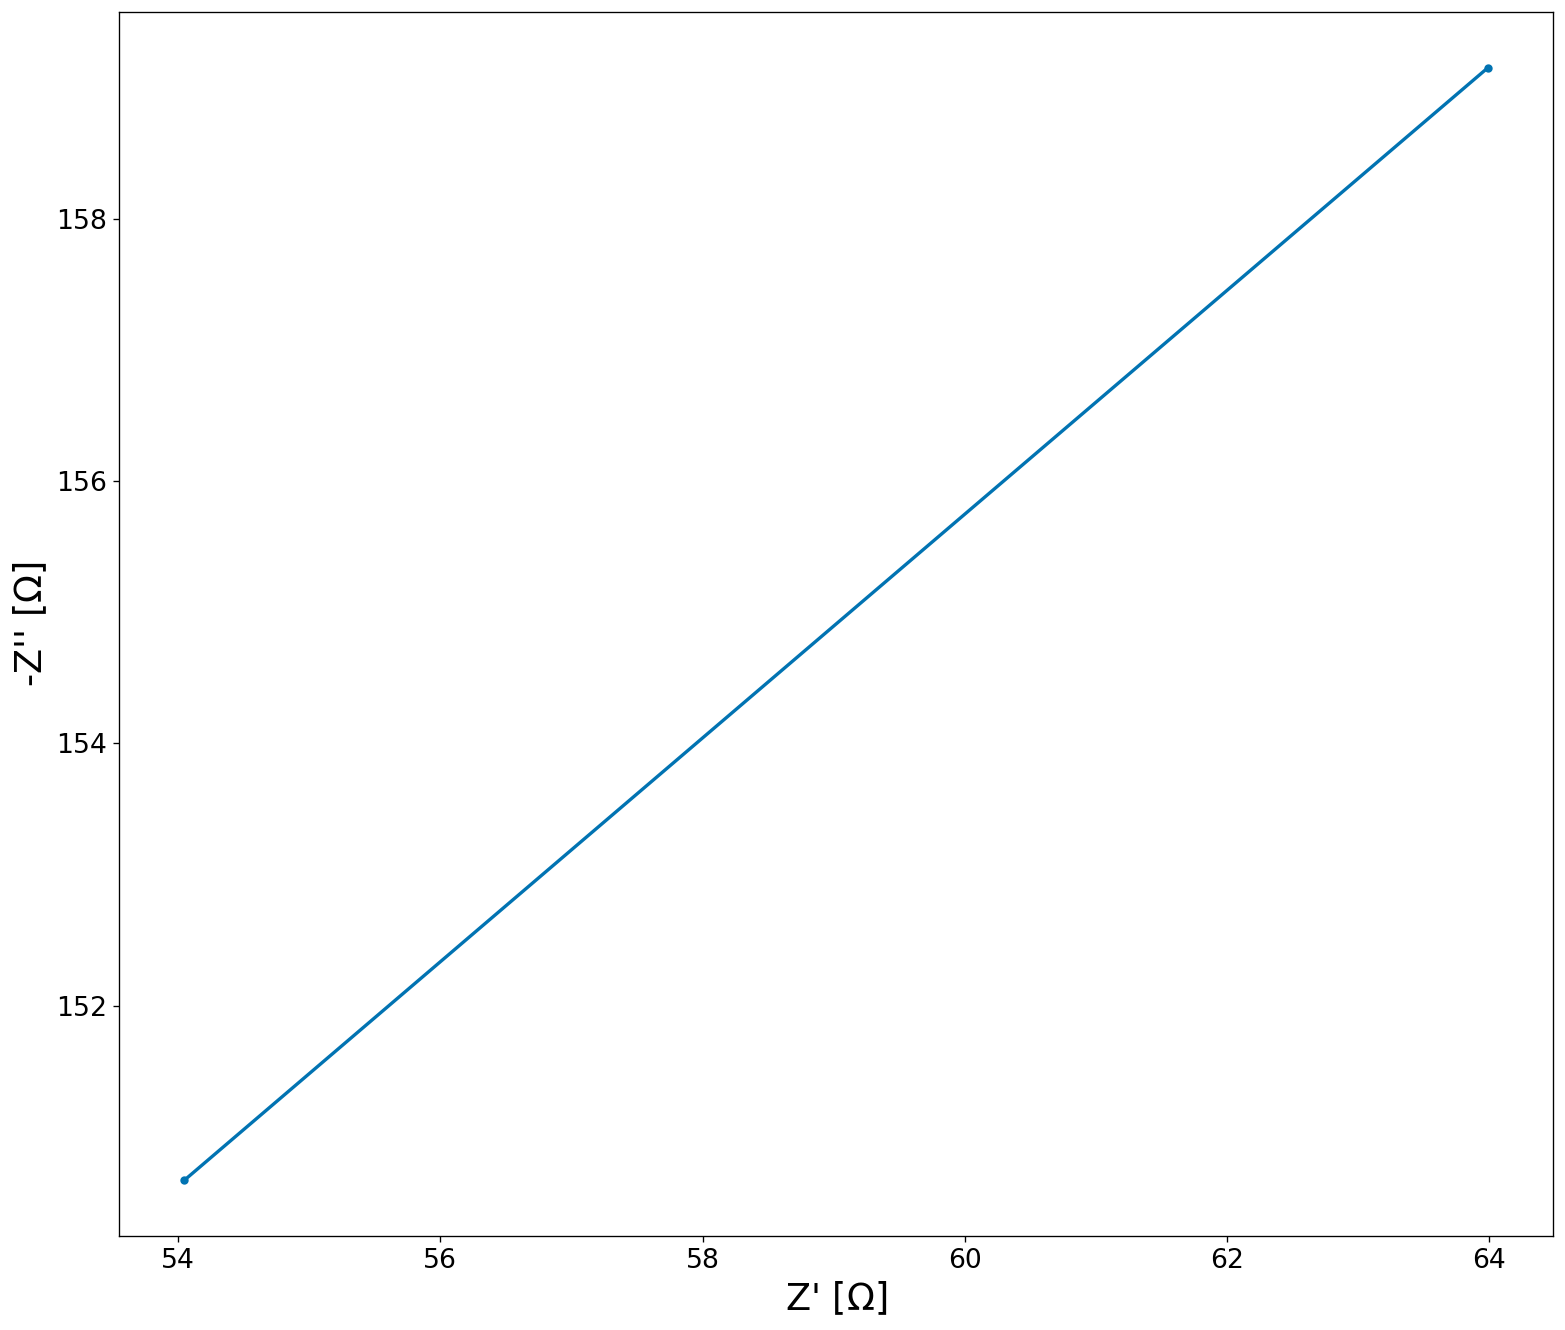

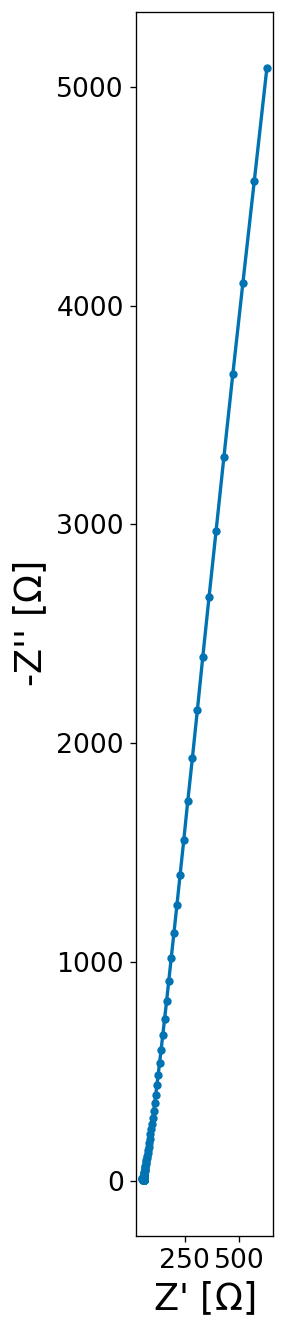

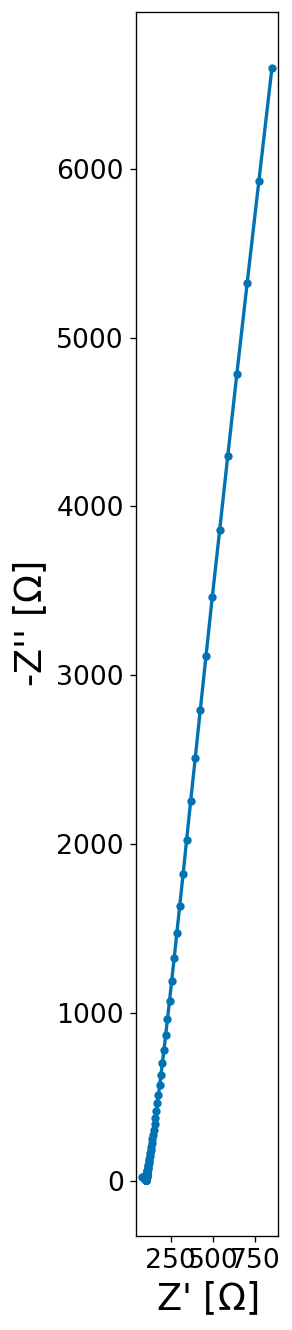

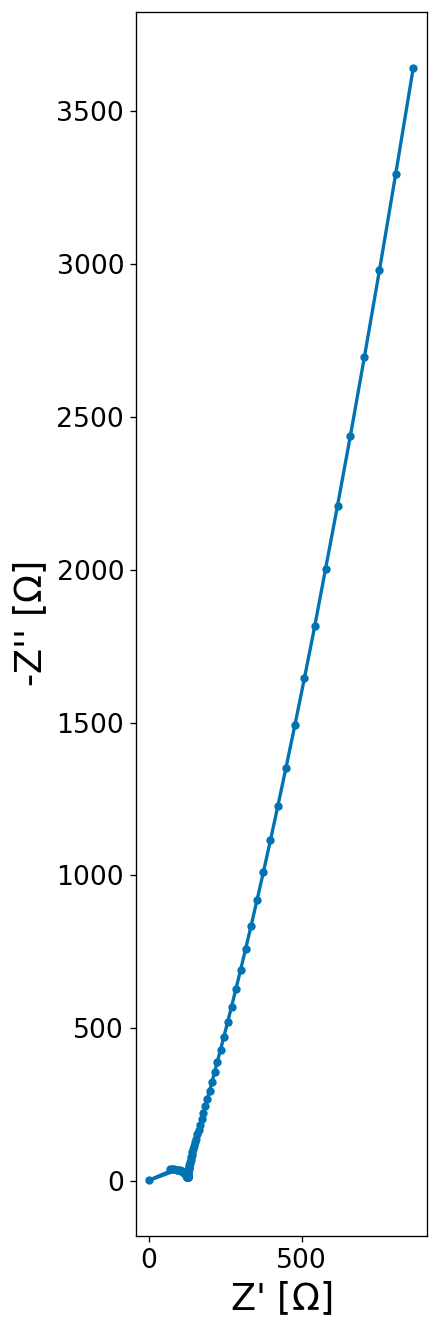

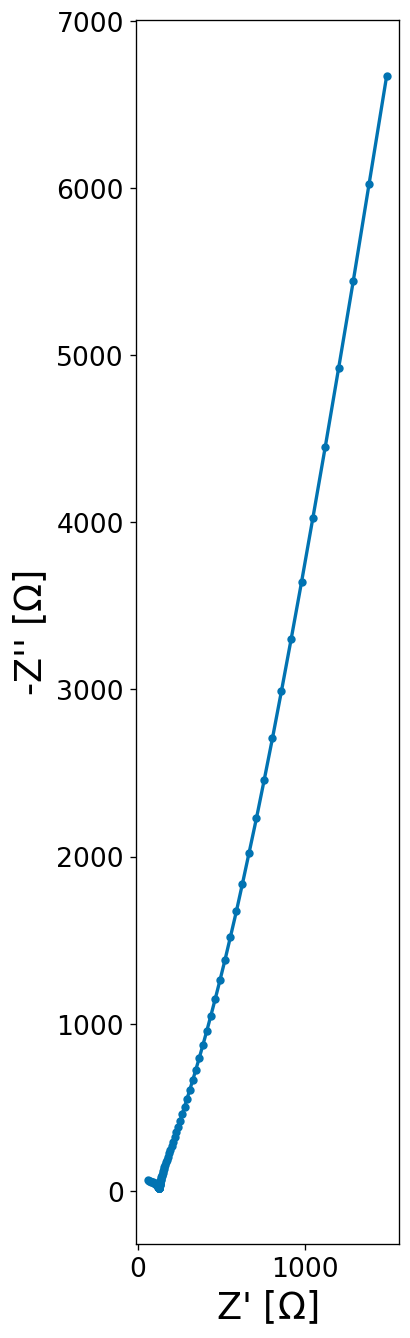

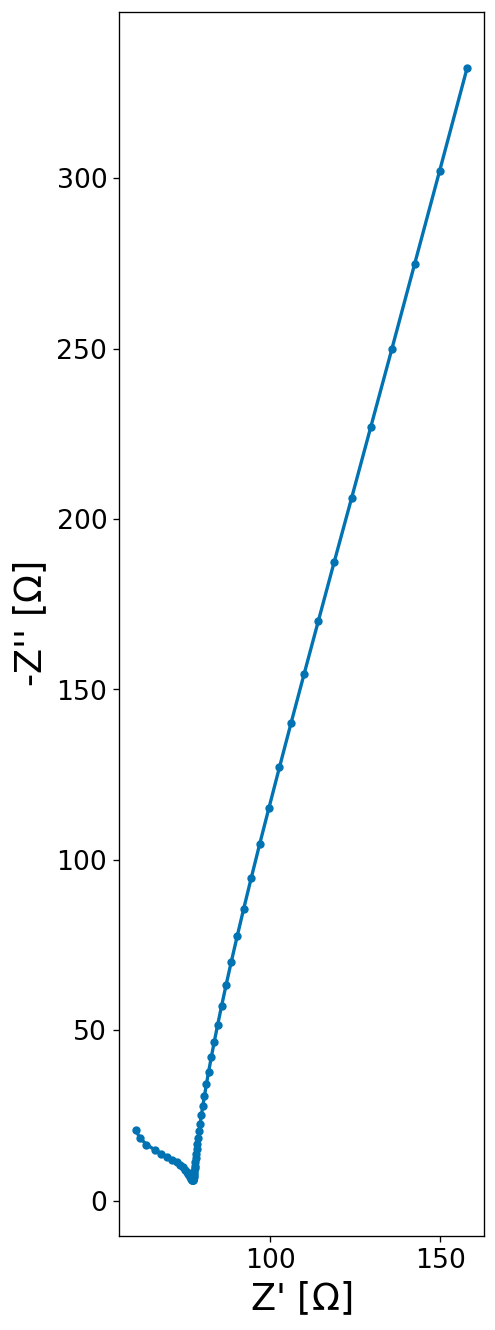

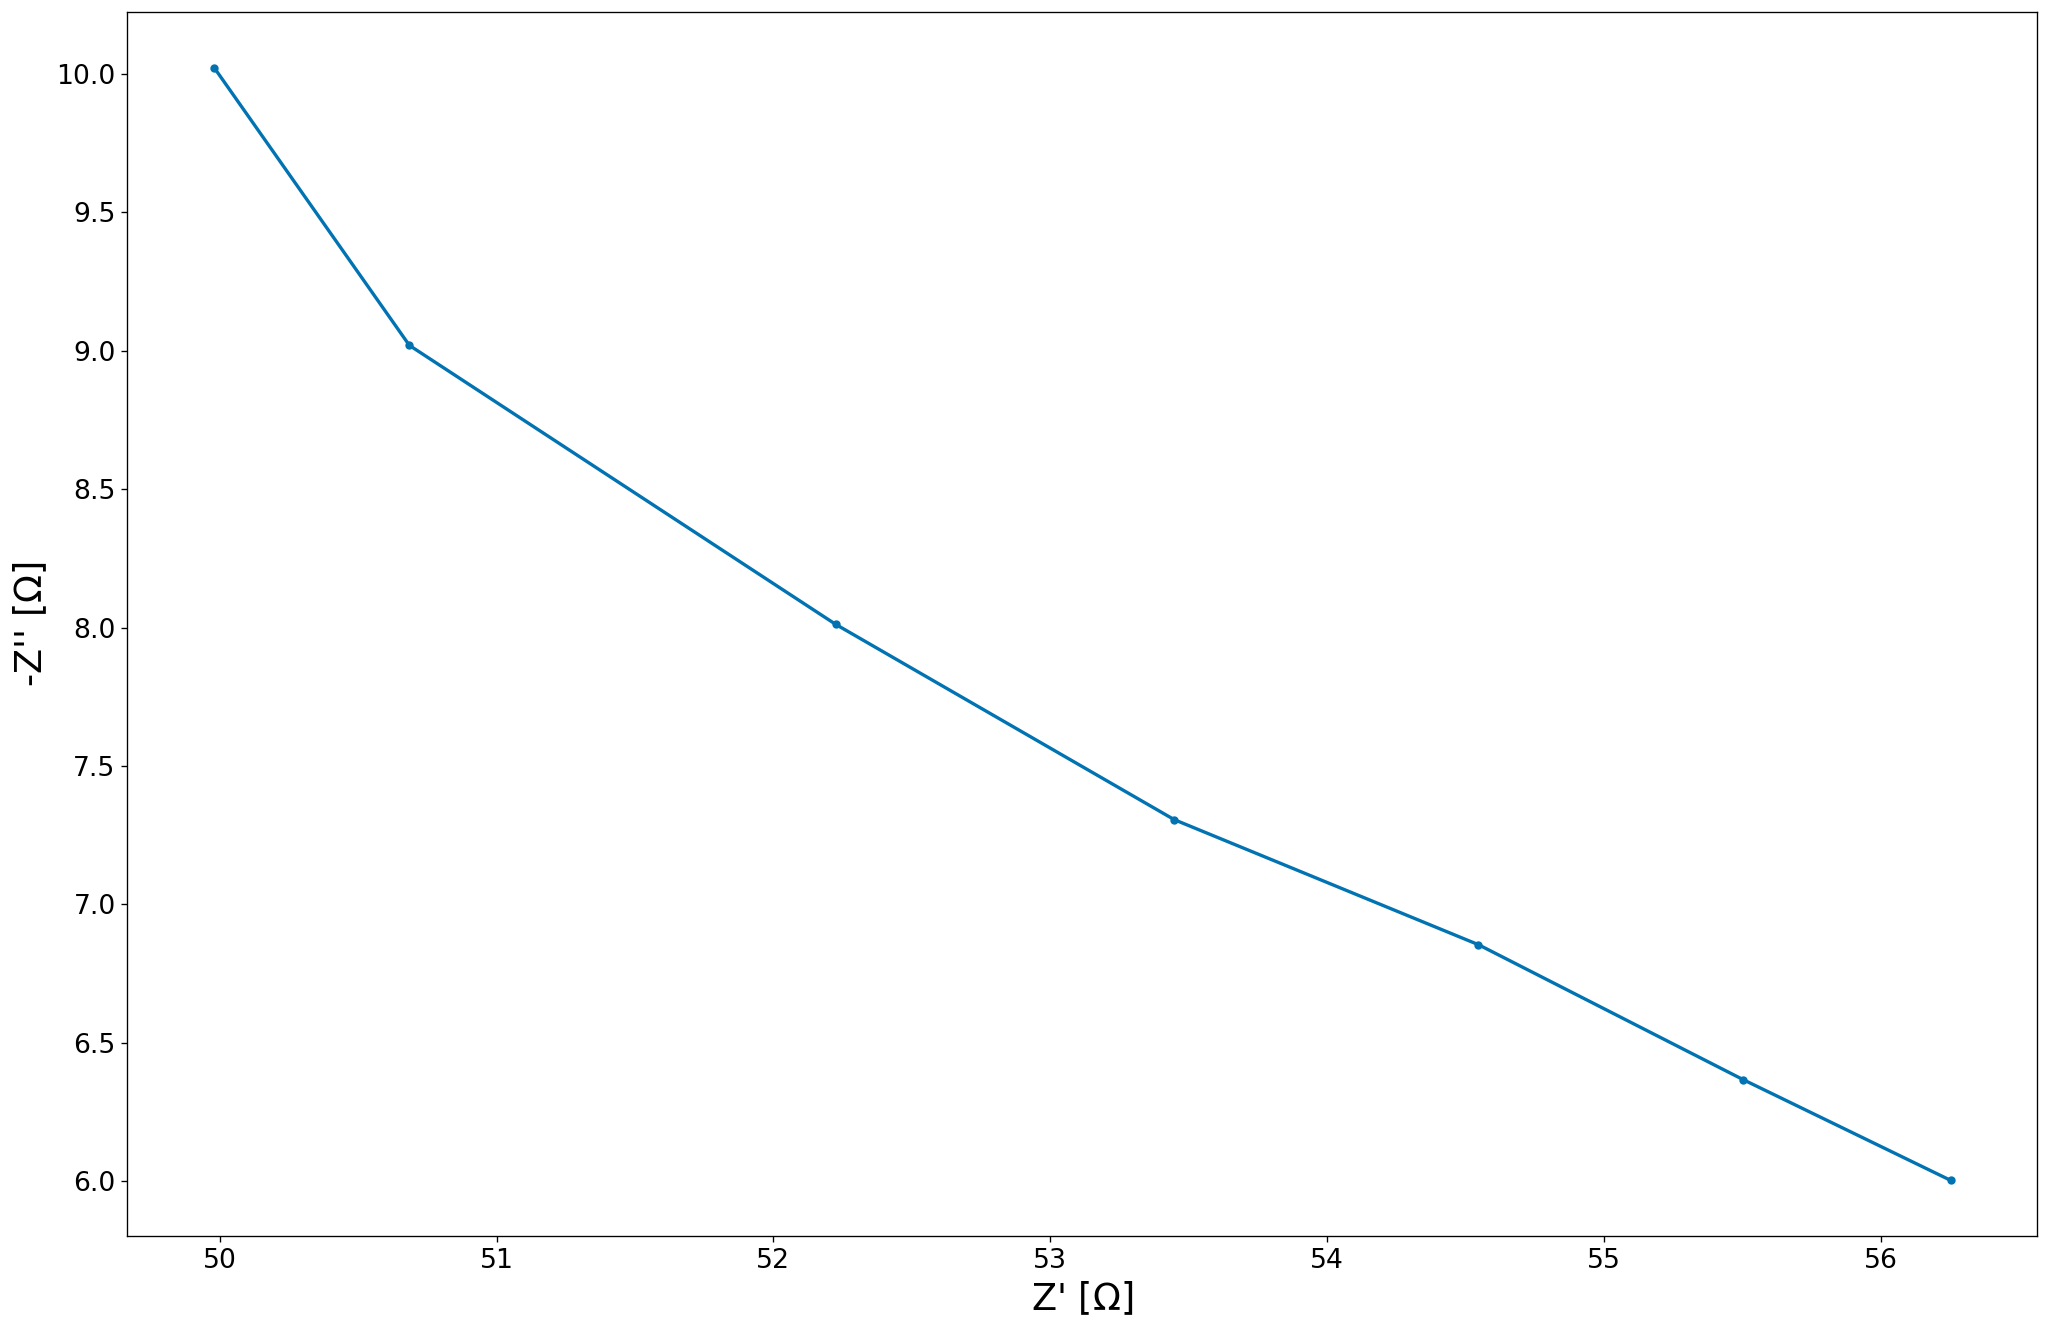

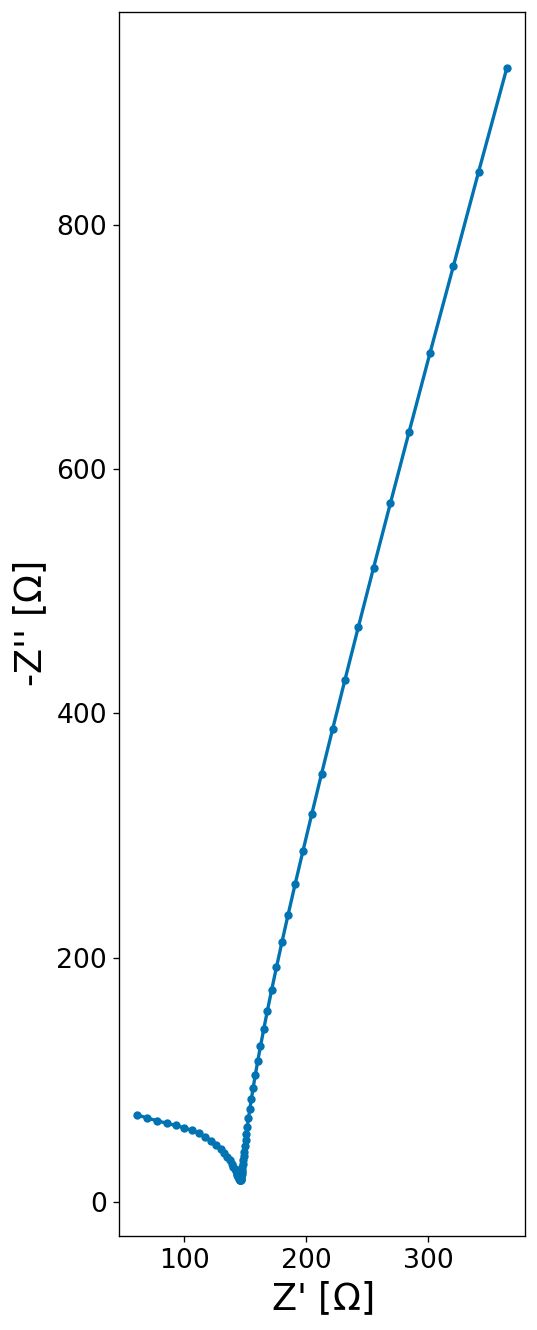

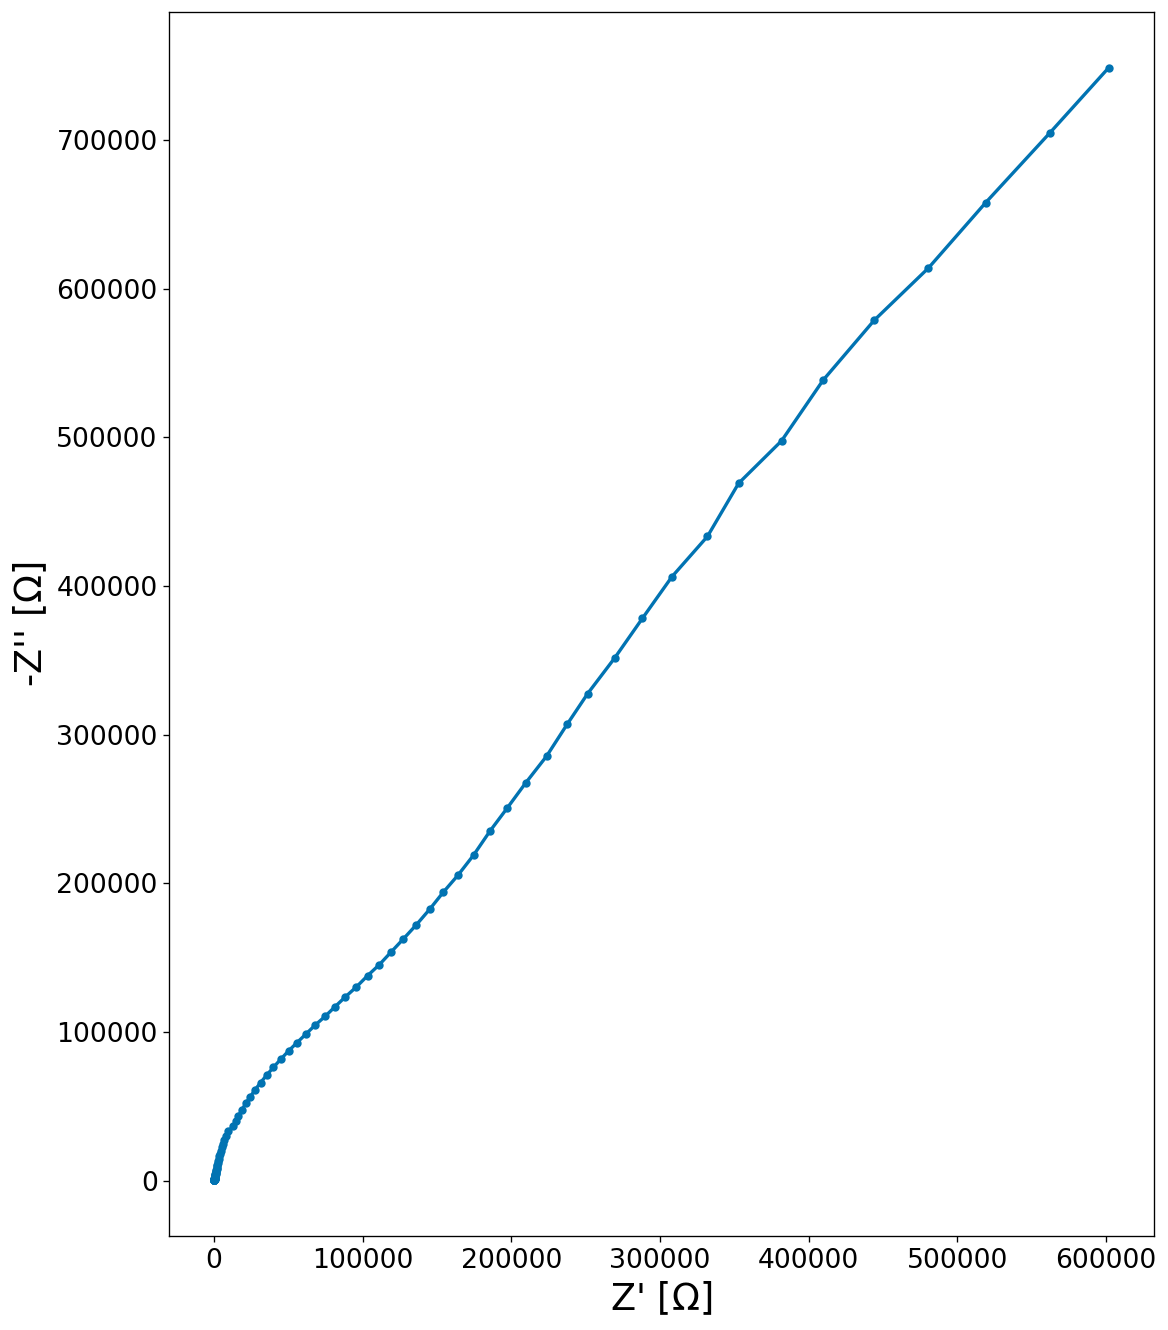

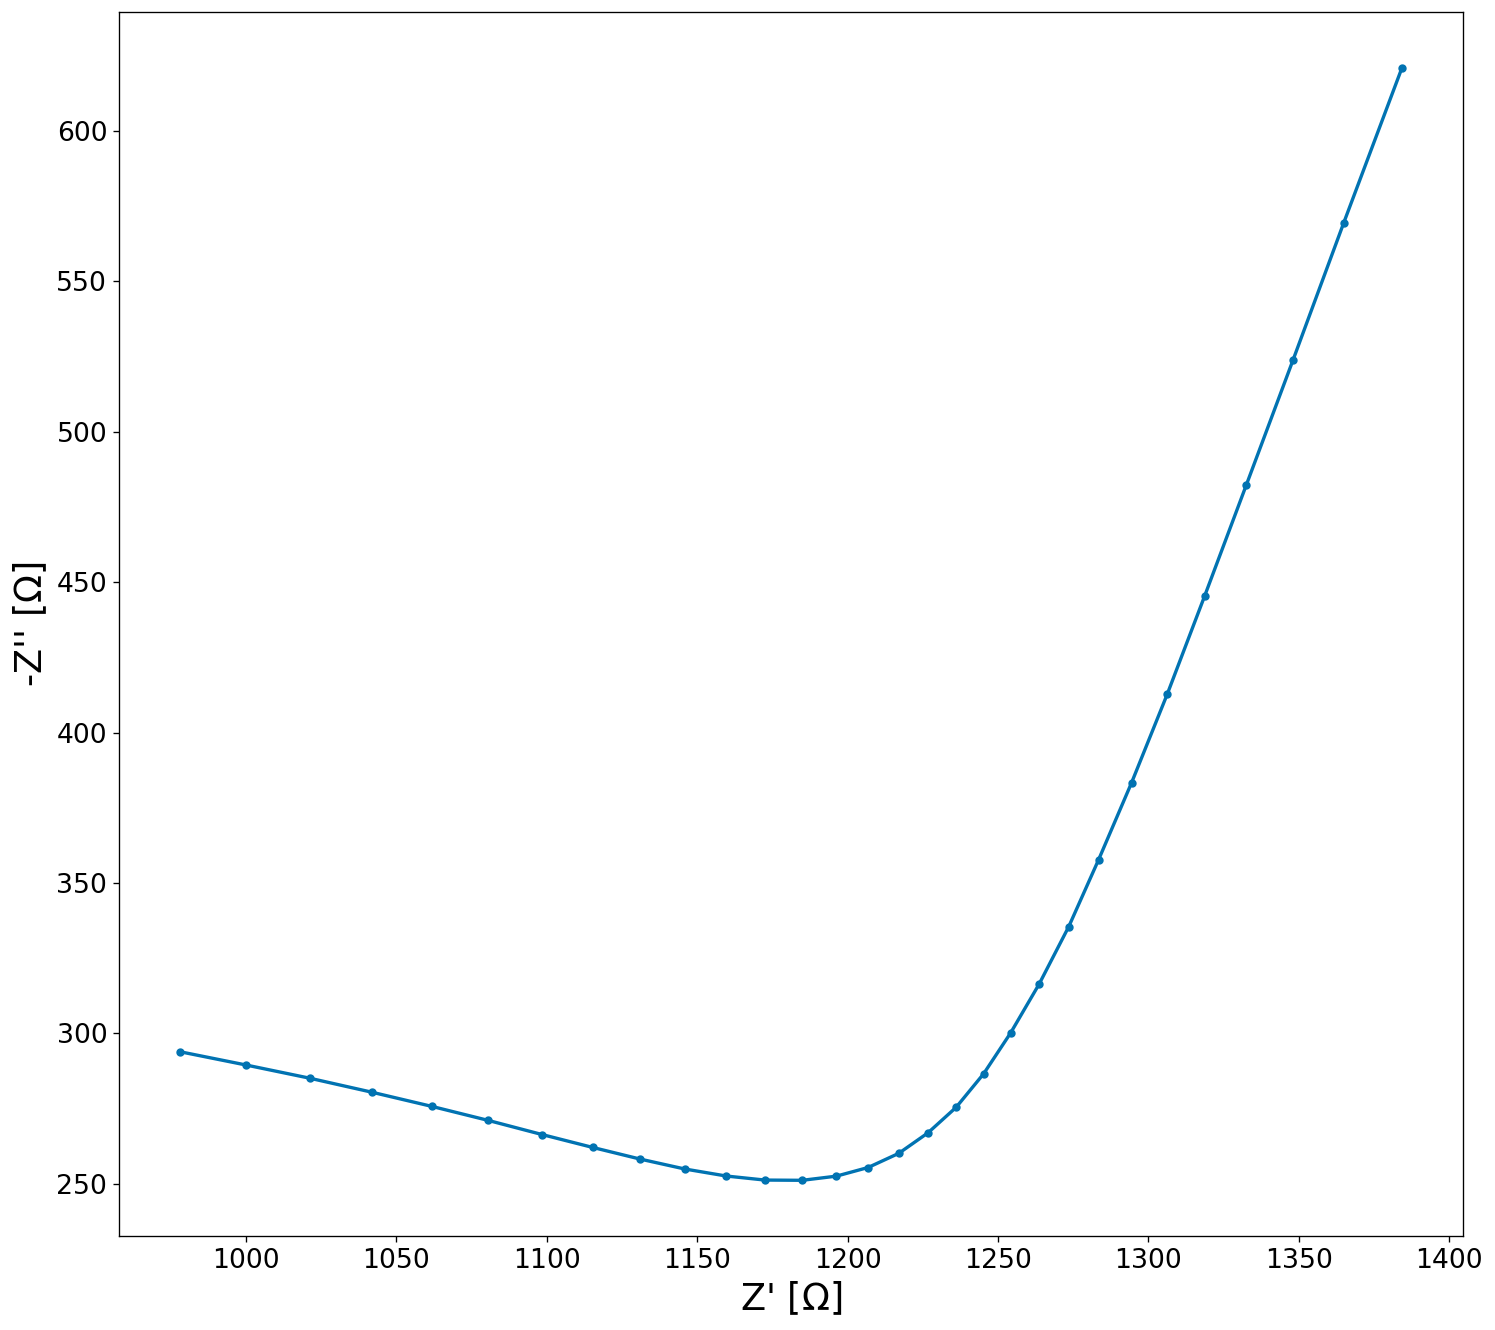

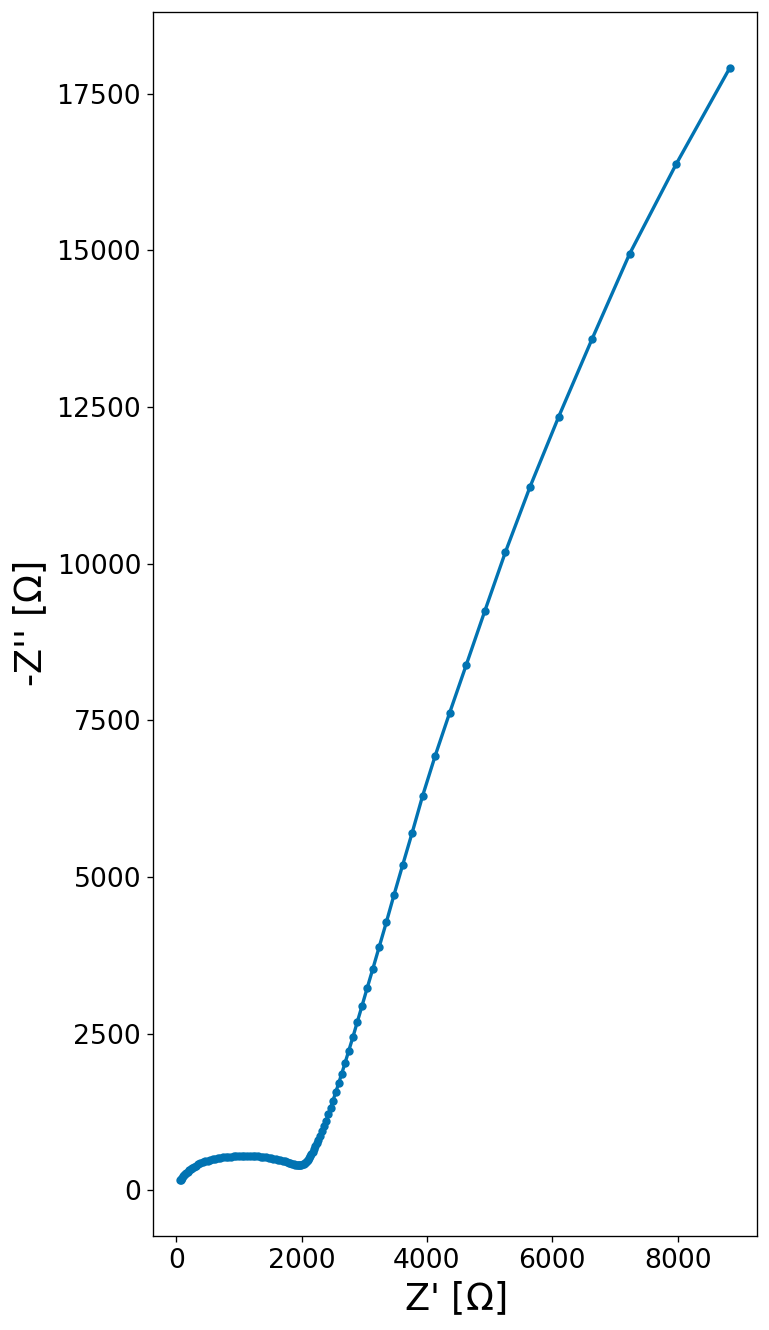

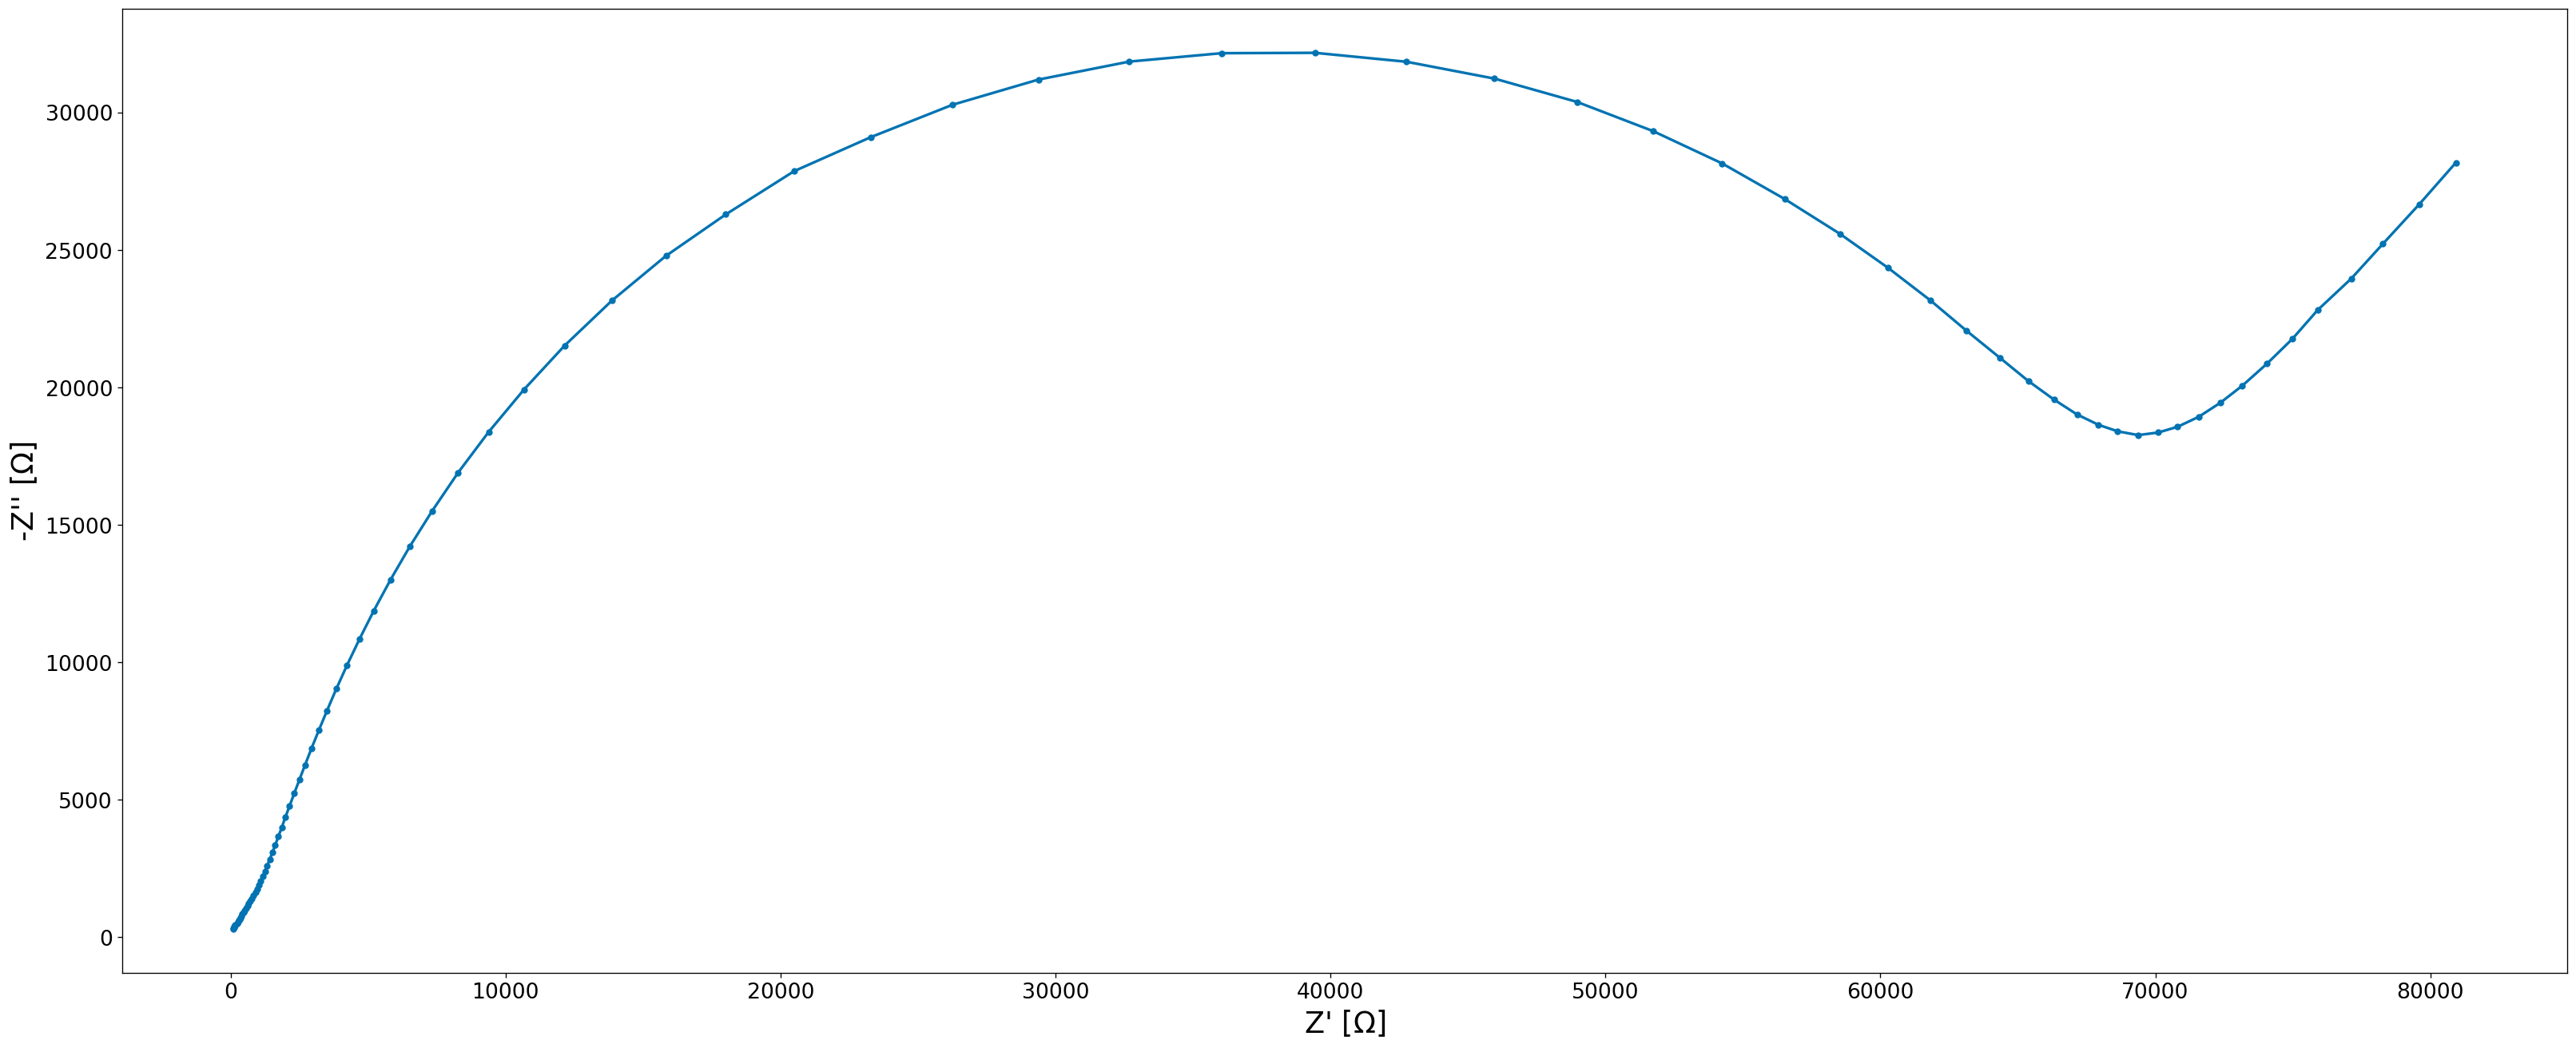

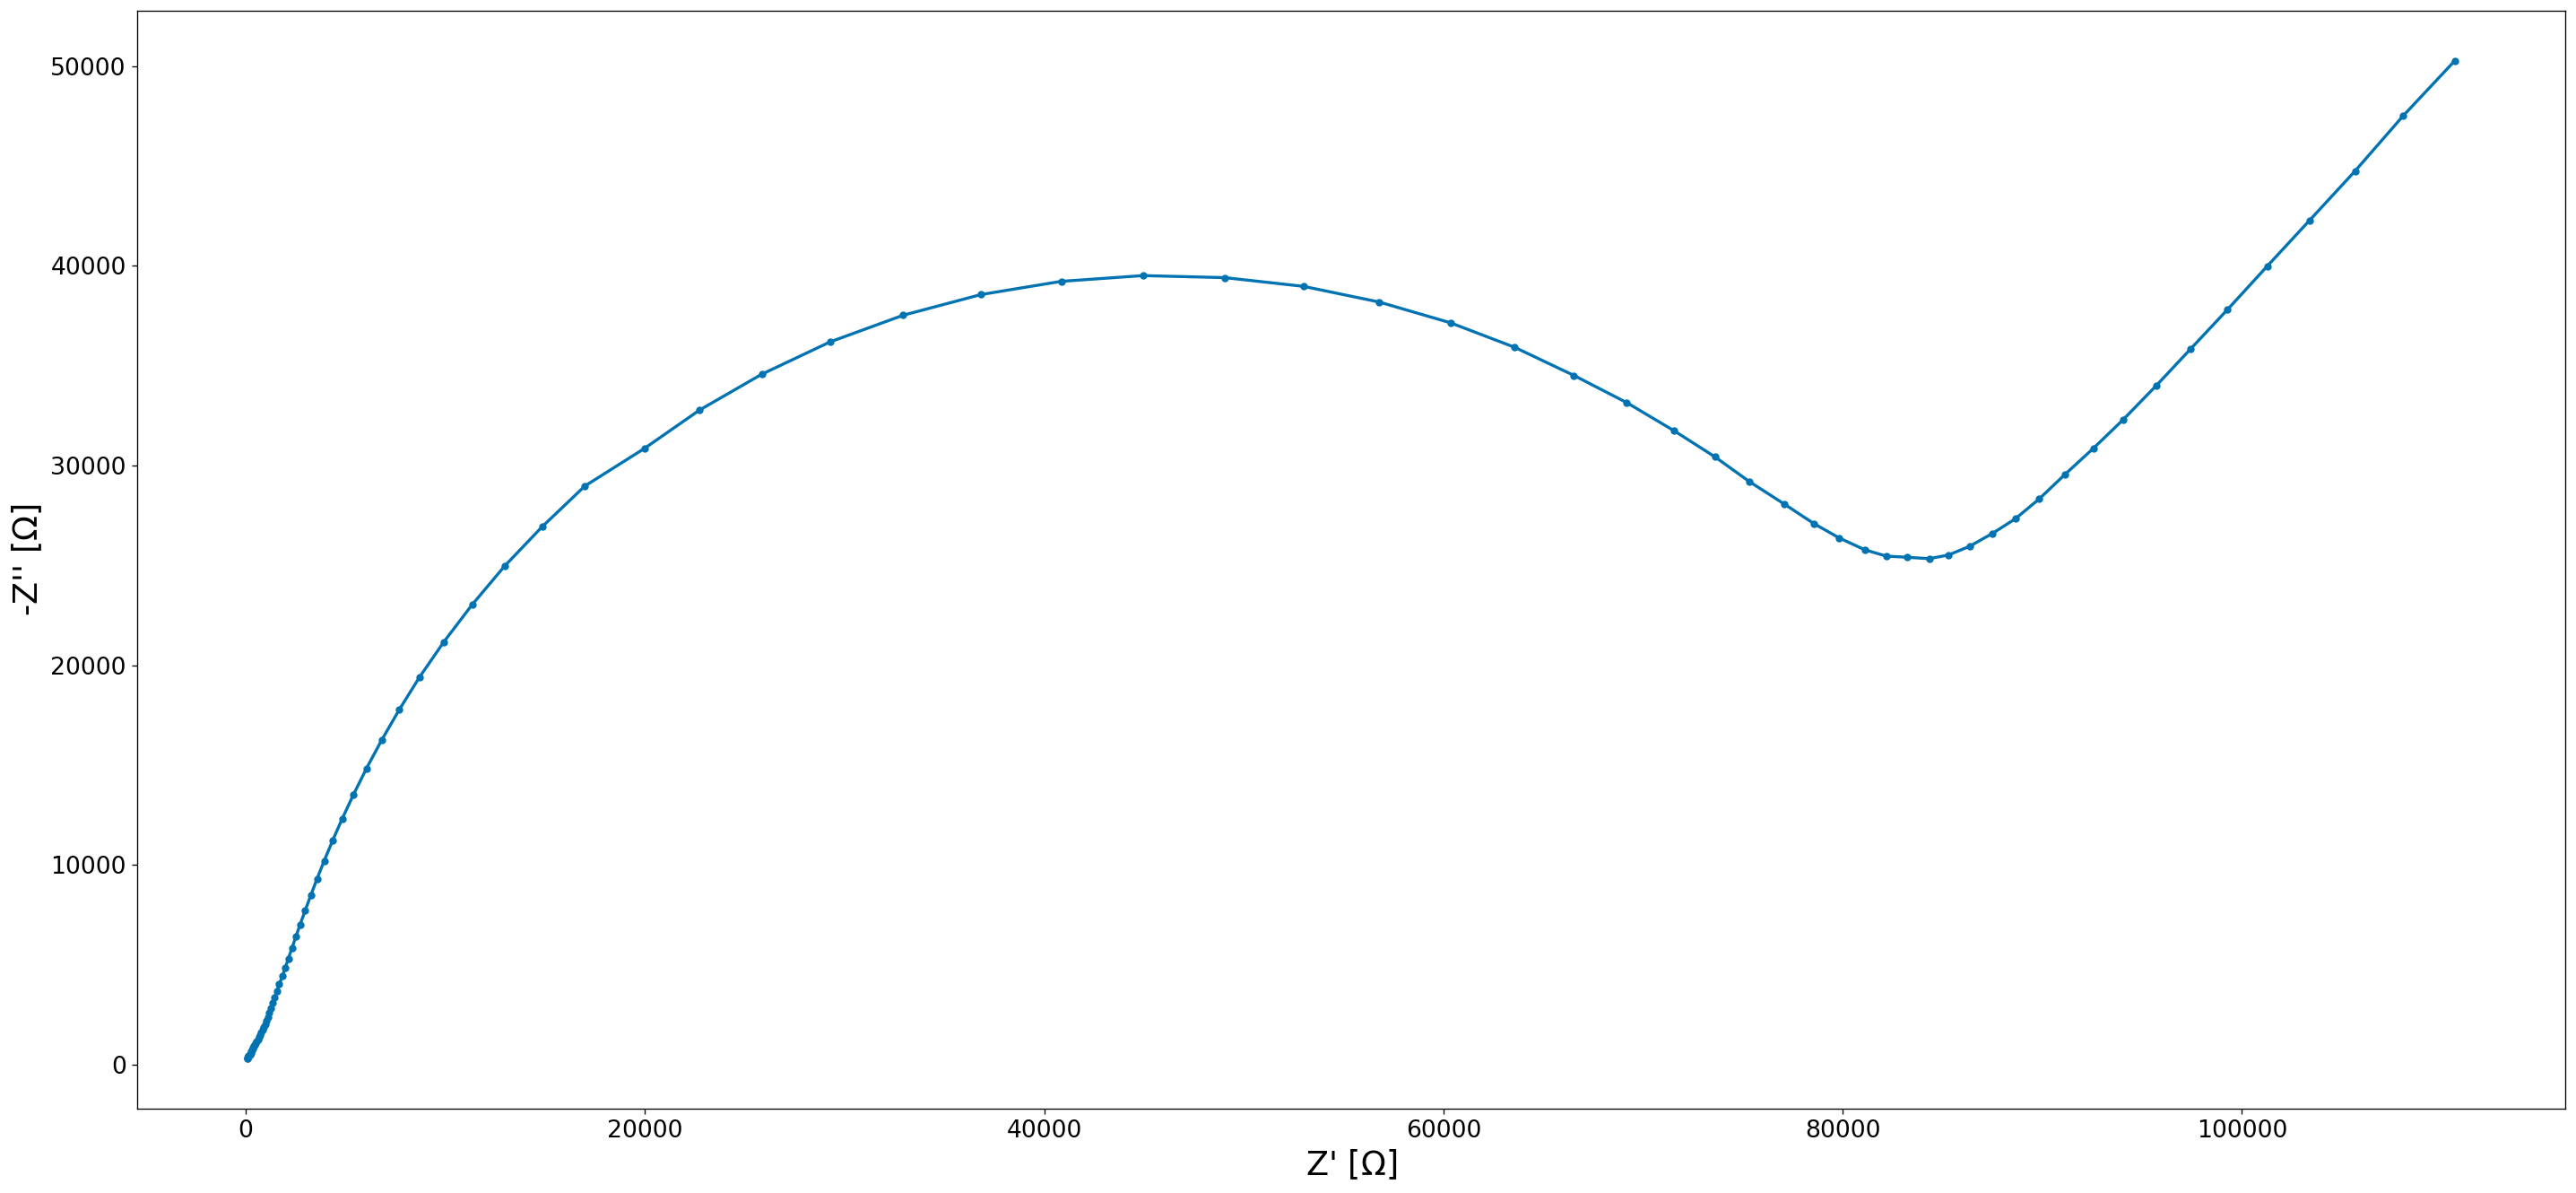

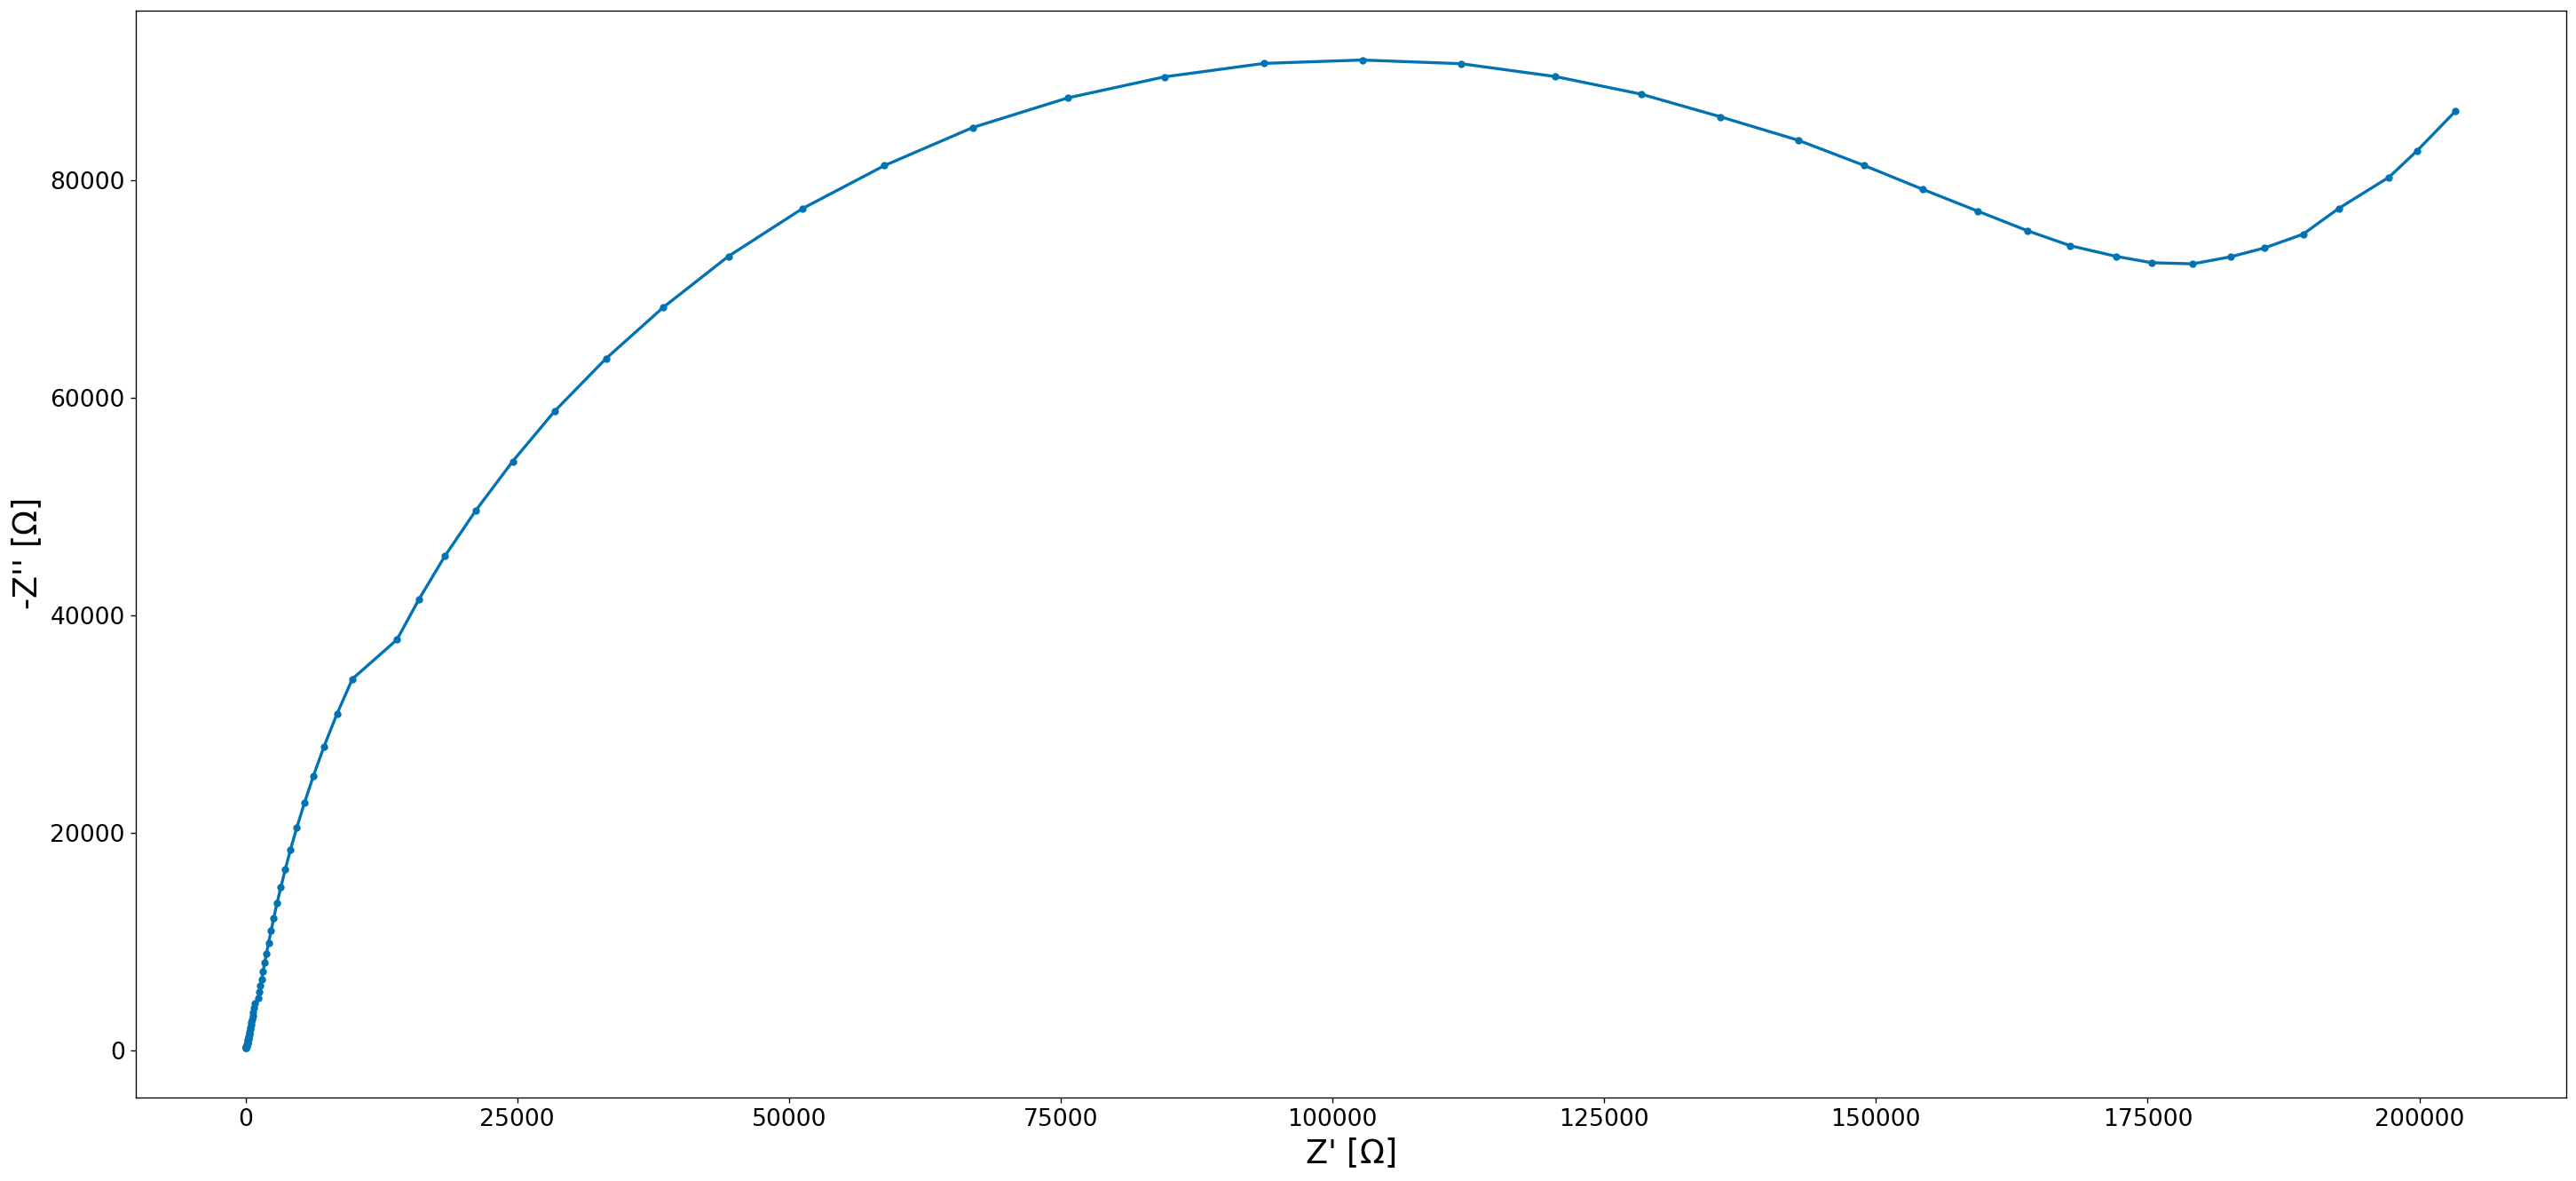

In [4]:
full_graphing(path)

In [12]:
#PATH takes in a string that leads to the files
#CSV_CONTAINER takes an additional path that leads to a separate folder which will contain all the fitted coefficients
#if you want to just fit a single mpt or a list of mpts, you can use LST for specific fittings
#TAKE_CSV for when you want to export a csv

def auto_fit(path, csv_container, lst = None, take_csv = False):
    bad_mpts = []
    fitted_files = [f for f in listdir(csv_container) if isfile(join(csv_container, f)) if f[:9] == 'fitted_DE']
    path_files = [f for f in listdir(path) if isfile(join(path, f)) if f[-3:] == 'mpt']
    if not lst:
        for i in path_files:
            try:
                #print(i, ' was a permissible file')
                ex_mpt = mpt_data(path,[i])
                out_name = 'fitted_' + ex_mpt.data[0][:-4]
                if out_name not in fitted_files:
                    masked_mpt = mpt_data(path,[i], mask = ex_mpt.masker())
                    masked_mpt.guesser(csv_container = csv_container, to_csv = take_csv)
                else:
                    print(i, ' has already been fitted!!')
                    continue
            except ValueError:
                ex_mpt = mpt_data(path,[i])
                out_name = 'fitted_' + ex_mpt.data[0][:-4]
                if out_name in fitted_files:
                    print(i, ' has already been fitted!!')
                    continue
                bad_mpts.append(i)
                ex_mpt.mpt_plot()
                print(i, ' was a bad file, could not find a mask')
            except TypeError:
                ex_mpt = mpt_data(path,[i])
                out_name = 'fitted_' + ex_mpt.data[0][:-4]
                if out_name in fitted_files:
                    print(i, ' has already been fitted!!')
                    continue
                ex_mpt.guesser(csv_container = csv_container, to_csv = take_csv)
                print(i, ' was fittable, but could not obtain a mask')
    for i in lst:
            try:
                #print(i, ' was a permissible file')
                ex_mpt = mpt_data(path,[i])
                out_name = 'fitted_' + ex_mpt.data[0][:-4]
                if out_name not in fitted_files:
                    masked_mpt = mpt_data(path,[i], mask = ex_mpt.masker())
                    masked_mpt.guesser(csv_container = csv_container, to_csv = take_csv)
                else:
                    print(i, ' has already been fitted!!')
                    continue
            except ValueError:
                ex_mpt = mpt_data(path,[i])
                out_name = 'fitted_' + ex_mpt.data[0][:-4]
                if out_name in fitted_files:
                    print(i, ' has already been fitted!!')
                    continue
                bad_mpts.append(i)
                ex_mpt.mpt_plot()
                print(i, ' was a bad file, could not find a mask')
            except TypeError:
                ex_mpt = mpt_data(path,[i])
                out_name = 'fitted_' + ex_mpt.data[0][:-4]
                if out_name in fitted_files:
                    print(i, ' has already been fitted!!')
                    continue
                ex_mpt.guesser(csv_container = csv_container, to_csv = take_csv)
                print(i, ' was fittable, but could not obtain a mask')

In [13]:
auto_fit(path,r"C:\Users\cjang\Desktop\impedance_data\fitted_coeffs\\", lst = good_graphs, take_csv = True)

DE_49_7_30.mpt  has already been fitted!!
DE_49_8_30.mpt  has already been fitted!!
DE_49_9_30.mpt  has already been fitted!!


In [14]:
csv_container=r"C:\Users\cjang\Desktop\impedance_data\fitted_coeffs\\"
first_three = [f for f in listdir(path) if isfile(join(path, f)) if f[-3:] == 'mpt'][:3]
second_three = [f for f in listdir(path) if isfile(join(path, f)) if f[-3:] == 'mpt'][4:7]

In [15]:
auto_fit(path,r"C:\Users\cjang\Desktop\impedance_data\fitted_coeffs\\", lst = first_three, take_csv = True)

DE_40_10_60.mpt  has already been fitted!!
DE_40_11_60.mpt  has already been fitted!!
DE_40_12_60.mpt  has already been fitted!!


No handles with labels found to put in legend.


DE_40_14_60.mpt  was a bad file, could not find a mask
DE_40_15_60.mpt  has already been fitted!!
MPT FILE :  DE_40_1_30.mpt  ERROR:  1818973.8041008615
MPT FILE :  DE_40_1_30.mpt  ERROR:  16874818.549103677
MPT FILE :  DE_40_1_30.mpt  ERROR:  16874818.549103677
MPT FILE :  DE_40_1_30.mpt  ERROR:  16874818.549103677
MPT FILE :  DE_40_1_30.mpt  ERROR:  16874842.472591612
MPT FILE :  DE_40_1_30.mpt  ERROR:  16874818.549103677
MPT FILE :  DE_40_1_30.mpt  ERROR:  16874818.54910377
MPT FILE :  DE_40_1_30.mpt  ERROR:  16874818.549103674
MPT FILE :  DE_40_1_30.mpt  ERROR:  16874818.549083043
MPT FILE :  DE_40_1_30.mpt  ERROR:  16874818.549103696
MPT FILE :  DE_40_1_30.mpt  ERROR:  16874818.54872004
MPT FILE :  DE_40_1_30.mpt  ERROR:  16874818.549103677
MPT FILE :  DE_40_1_30.mpt  ERROR:  16874818.549099892
MPT FILE :  DE_40_1_30.mpt  ERROR:  3560921562458.46
MPT FILE :  DE_40_1_30.mpt  ERROR:  4938788689731.746
MPT FILE :  DE_40_1_30.mpt  ERROR:  41290051845924.2
MPT FILE :  DE_40_1_30.mpt  E

MPT FILE :  DE_40_1_30.mpt  ERROR:  264982.3337504914
MPT FILE :  DE_40_1_30.mpt  ERROR:  246959.01246314746
MPT FILE :  DE_40_1_30.mpt  ERROR:  246959.03485196963
MPT FILE :  DE_40_1_30.mpt  ERROR:  246958.98880317764
MPT FILE :  DE_40_1_30.mpt  ERROR:  246959.0124572611
MPT FILE :  DE_40_1_30.mpt  ERROR:  246959.01873659974
MPT FILE :  DE_40_1_30.mpt  ERROR:  246959.010968144
MPT FILE :  DE_40_1_30.mpt  ERROR:  246959.0122270331
MPT FILE :  DE_40_1_30.mpt  ERROR:  246959.01196604865
MPT FILE :  DE_40_1_30.mpt  ERROR:  246959.01192921016
MPT FILE :  DE_40_1_30.mpt  ERROR:  246959.01231764455
MPT FILE :  DE_40_1_30.mpt  ERROR:  220555.522360399
MPT FILE :  DE_40_1_30.mpt  ERROR:  220555.54374064872
MPT FILE :  DE_40_1_30.mpt  ERROR:  220555.50393703874
MPT FILE :  DE_40_1_30.mpt  ERROR:  220555.52236685384
MPT FILE :  DE_40_1_30.mpt  ERROR:  220555.53162431996
MPT FILE :  DE_40_1_30.mpt  ERROR:  220555.51052288554
MPT FILE :  DE_40_1_30.mpt  ERROR:  220555.50543316198
MPT FILE :  DE_40

MPT FILE :  DE_40_1_30.mpt  ERROR:  143279.1570092535
MPT FILE :  DE_40_1_30.mpt  ERROR:  142658.6558976729
MPT FILE :  DE_40_1_30.mpt  ERROR:  142658.66434108792
MPT FILE :  DE_40_1_30.mpt  ERROR:  142658.64663975182
MPT FILE :  DE_40_1_30.mpt  ERROR:  142658.6558976729
MPT FILE :  DE_40_1_30.mpt  ERROR:  142658.66620453855
MPT FILE :  DE_40_1_30.mpt  ERROR:  142658.6631225635
MPT FILE :  DE_40_1_30.mpt  ERROR:  142658.6558976741
MPT FILE :  DE_40_1_30.mpt  ERROR:  142658.6558976731
MPT FILE :  DE_40_1_30.mpt  ERROR:  142658.65614724634
MPT FILE :  DE_40_1_30.mpt  ERROR:  142658.65702210026
MPT FILE :  DE_40_1_30.mpt  ERROR:  141176.95926514996
MPT FILE :  DE_40_1_30.mpt  ERROR:  141176.96747741185
MPT FILE :  DE_40_1_30.mpt  ERROR:  141176.95025636358
MPT FILE :  DE_40_1_30.mpt  ERROR:  141176.95926514996
MPT FILE :  DE_40_1_30.mpt  ERROR:  141176.96961853202
MPT FILE :  DE_40_1_30.mpt  ERROR:  141176.95653213875
MPT FILE :  DE_40_1_30.mpt  ERROR:  141176.9592651501
MPT FILE :  DE_40

MPT FILE :  DE_40_1_30.mpt  ERROR:  121454.16560918067
MPT FILE :  DE_40_1_30.mpt  ERROR:  121454.16989310781
MPT FILE :  DE_40_1_30.mpt  ERROR:  121454.1597813537
MPT FILE :  DE_40_1_30.mpt  ERROR:  121454.16560918067
MPT FILE :  DE_40_1_30.mpt  ERROR:  121454.17606695957
MPT FILE :  DE_40_1_30.mpt  ERROR:  121454.16560918067
MPT FILE :  DE_40_1_30.mpt  ERROR:  121454.16560918067
MPT FILE :  DE_40_1_30.mpt  ERROR:  121454.16560918067
MPT FILE :  DE_40_1_30.mpt  ERROR:  121454.16574838615
MPT FILE :  DE_40_1_30.mpt  ERROR:  121454.16585762778
MPT FILE :  DE_40_1_30.mpt  ERROR:  120079.63702152719
MPT FILE :  DE_40_1_30.mpt  ERROR:  120079.64112399911
MPT FILE :  DE_40_1_30.mpt  ERROR:  120079.63148777
MPT FILE :  DE_40_1_30.mpt  ERROR:  120079.63702152719
MPT FILE :  DE_40_1_30.mpt  ERROR:  120079.64755126511
MPT FILE :  DE_40_1_30.mpt  ERROR:  120079.63702152716
MPT FILE :  DE_40_1_30.mpt  ERROR:  120079.63702152719
MPT FILE :  DE_40_1_30.mpt  ERROR:  120079.63702152719
MPT FILE :  DE

MPT FILE :  DE_40_1_30.mpt  ERROR:  74181.23532488411
MPT FILE :  DE_40_1_30.mpt  ERROR:  74181.2353248838
MPT FILE :  DE_40_1_30.mpt  ERROR:  74181.23534886554
MPT FILE :  DE_40_1_30.mpt  ERROR:  74181.2354388256
MPT FILE :  DE_40_1_30.mpt  ERROR:  74034.20493254435
MPT FILE :  DE_40_1_30.mpt  ERROR:  74034.20706998536
MPT FILE :  DE_40_1_30.mpt  ERROR:  74034.20594781662
MPT FILE :  DE_40_1_30.mpt  ERROR:  74034.20493254435
MPT FILE :  DE_40_1_30.mpt  ERROR:  74034.21641001331
MPT FILE :  DE_40_1_30.mpt  ERROR:  74034.20473368707
MPT FILE :  DE_40_1_30.mpt  ERROR:  74034.20493254435
MPT FILE :  DE_40_1_30.mpt  ERROR:  74034.20493254419
MPT FILE :  DE_40_1_30.mpt  ERROR:  74034.20500909399
MPT FILE :  DE_40_1_30.mpt  ERROR:  74034.20494713794
MPT FILE :  DE_40_1_30.mpt  ERROR:  73932.06646510737
MPT FILE :  DE_40_1_30.mpt  ERROR:  73932.06857711714
MPT FILE :  DE_40_1_30.mpt  ERROR:  73932.06747849815
MPT FILE :  DE_40_1_30.mpt  ERROR:  73932.06646510737
MPT FILE :  DE_40_1_30.mpt  ER

MPT FILE :  DE_40_1_30.mpt  ERROR:  73614.13075756983
MPT FILE :  DE_40_1_30.mpt  ERROR:  73602.70186053641
MPT FILE :  DE_40_1_30.mpt  ERROR:  73602.70398703351
MPT FILE :  DE_40_1_30.mpt  ERROR:  73602.703010647
MPT FILE :  DE_40_1_30.mpt  ERROR:  73602.70186053641
MPT FILE :  DE_40_1_30.mpt  ERROR:  73602.713426926
MPT FILE :  DE_40_1_30.mpt  ERROR:  73602.70185876255
MPT FILE :  DE_40_1_30.mpt  ERROR:  73602.70186053641
MPT FILE :  DE_40_1_30.mpt  ERROR:  73602.70186053636
MPT FILE :  DE_40_1_30.mpt  ERROR:  73602.70178612295
MPT FILE :  DE_40_1_30.mpt  ERROR:  73602.7018774758
MPT FILE :  DE_40_1_30.mpt  ERROR:  73598.31715636322
MPT FILE :  DE_40_1_30.mpt  ERROR:  73598.31928293366
MPT FILE :  DE_40_1_30.mpt  ERROR:  73598.31830806908
MPT FILE :  DE_40_1_30.mpt  ERROR:  73598.31715636322
MPT FILE :  DE_40_1_30.mpt  ERROR:  73598.3287239731
MPT FILE :  DE_40_1_30.mpt  ERROR:  73598.31715466327
MPT FILE :  DE_40_1_30.mpt  ERROR:  73598.31715636322
MPT FILE :  DE_40_1_30.mpt  ERROR:

No handles with labels found to put in legend.


 DE_40_1_30.mpt  ERROR:  73455.11964126029
MPT FILE :  DE_40_1_30.mpt  ERROR:  73455.11843695103
MPT FILE :  DE_40_1_30.mpt  ERROR:  73455.1300448734
MPT FILE :  DE_40_1_30.mpt  ERROR:  73455.1184365265
MPT FILE :  DE_40_1_30.mpt  ERROR:  73455.11843695103
MPT FILE :  DE_40_1_30.mpt  ERROR:  73455.11843695099
MPT FILE :  DE_40_1_30.mpt  ERROR:  73455.11840482446
MPT FILE :  DE_40_1_30.mpt  ERROR:  73455.1185046546
MPT FILE :  DE_40_1_30.mpt  ERROR:  73452.07496253209
MPT FILE :  DE_40_1_30.mpt  ERROR:  73452.07709163659
MPT FILE :  DE_40_1_30.mpt  ERROR:  73452.0761678718
MPT FILE :  DE_40_1_30.mpt  ERROR:  73452.07496253209
MPT FILE :  DE_40_1_30.mpt  ERROR:  73452.08657120127
MPT FILE :  DE_40_1_30.mpt  ERROR:  73452.07496211924
MPT FILE :  DE_40_1_30.mpt  ERROR:  73452.07496253209
MPT FILE :  DE_40_1_30.mpt  ERROR:  73452.07496253202
MPT FILE :  DE_40_1_30.mpt  ERROR:  73452.07499630858
MPT FILE :  DE_40_1_30.mpt  ERROR:  73452.07487255805
MPT FILE :  DE_40_1_30.mpt  ERROR:  73450.6

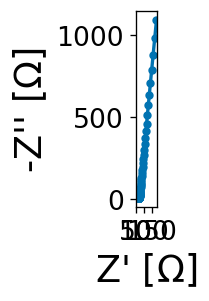

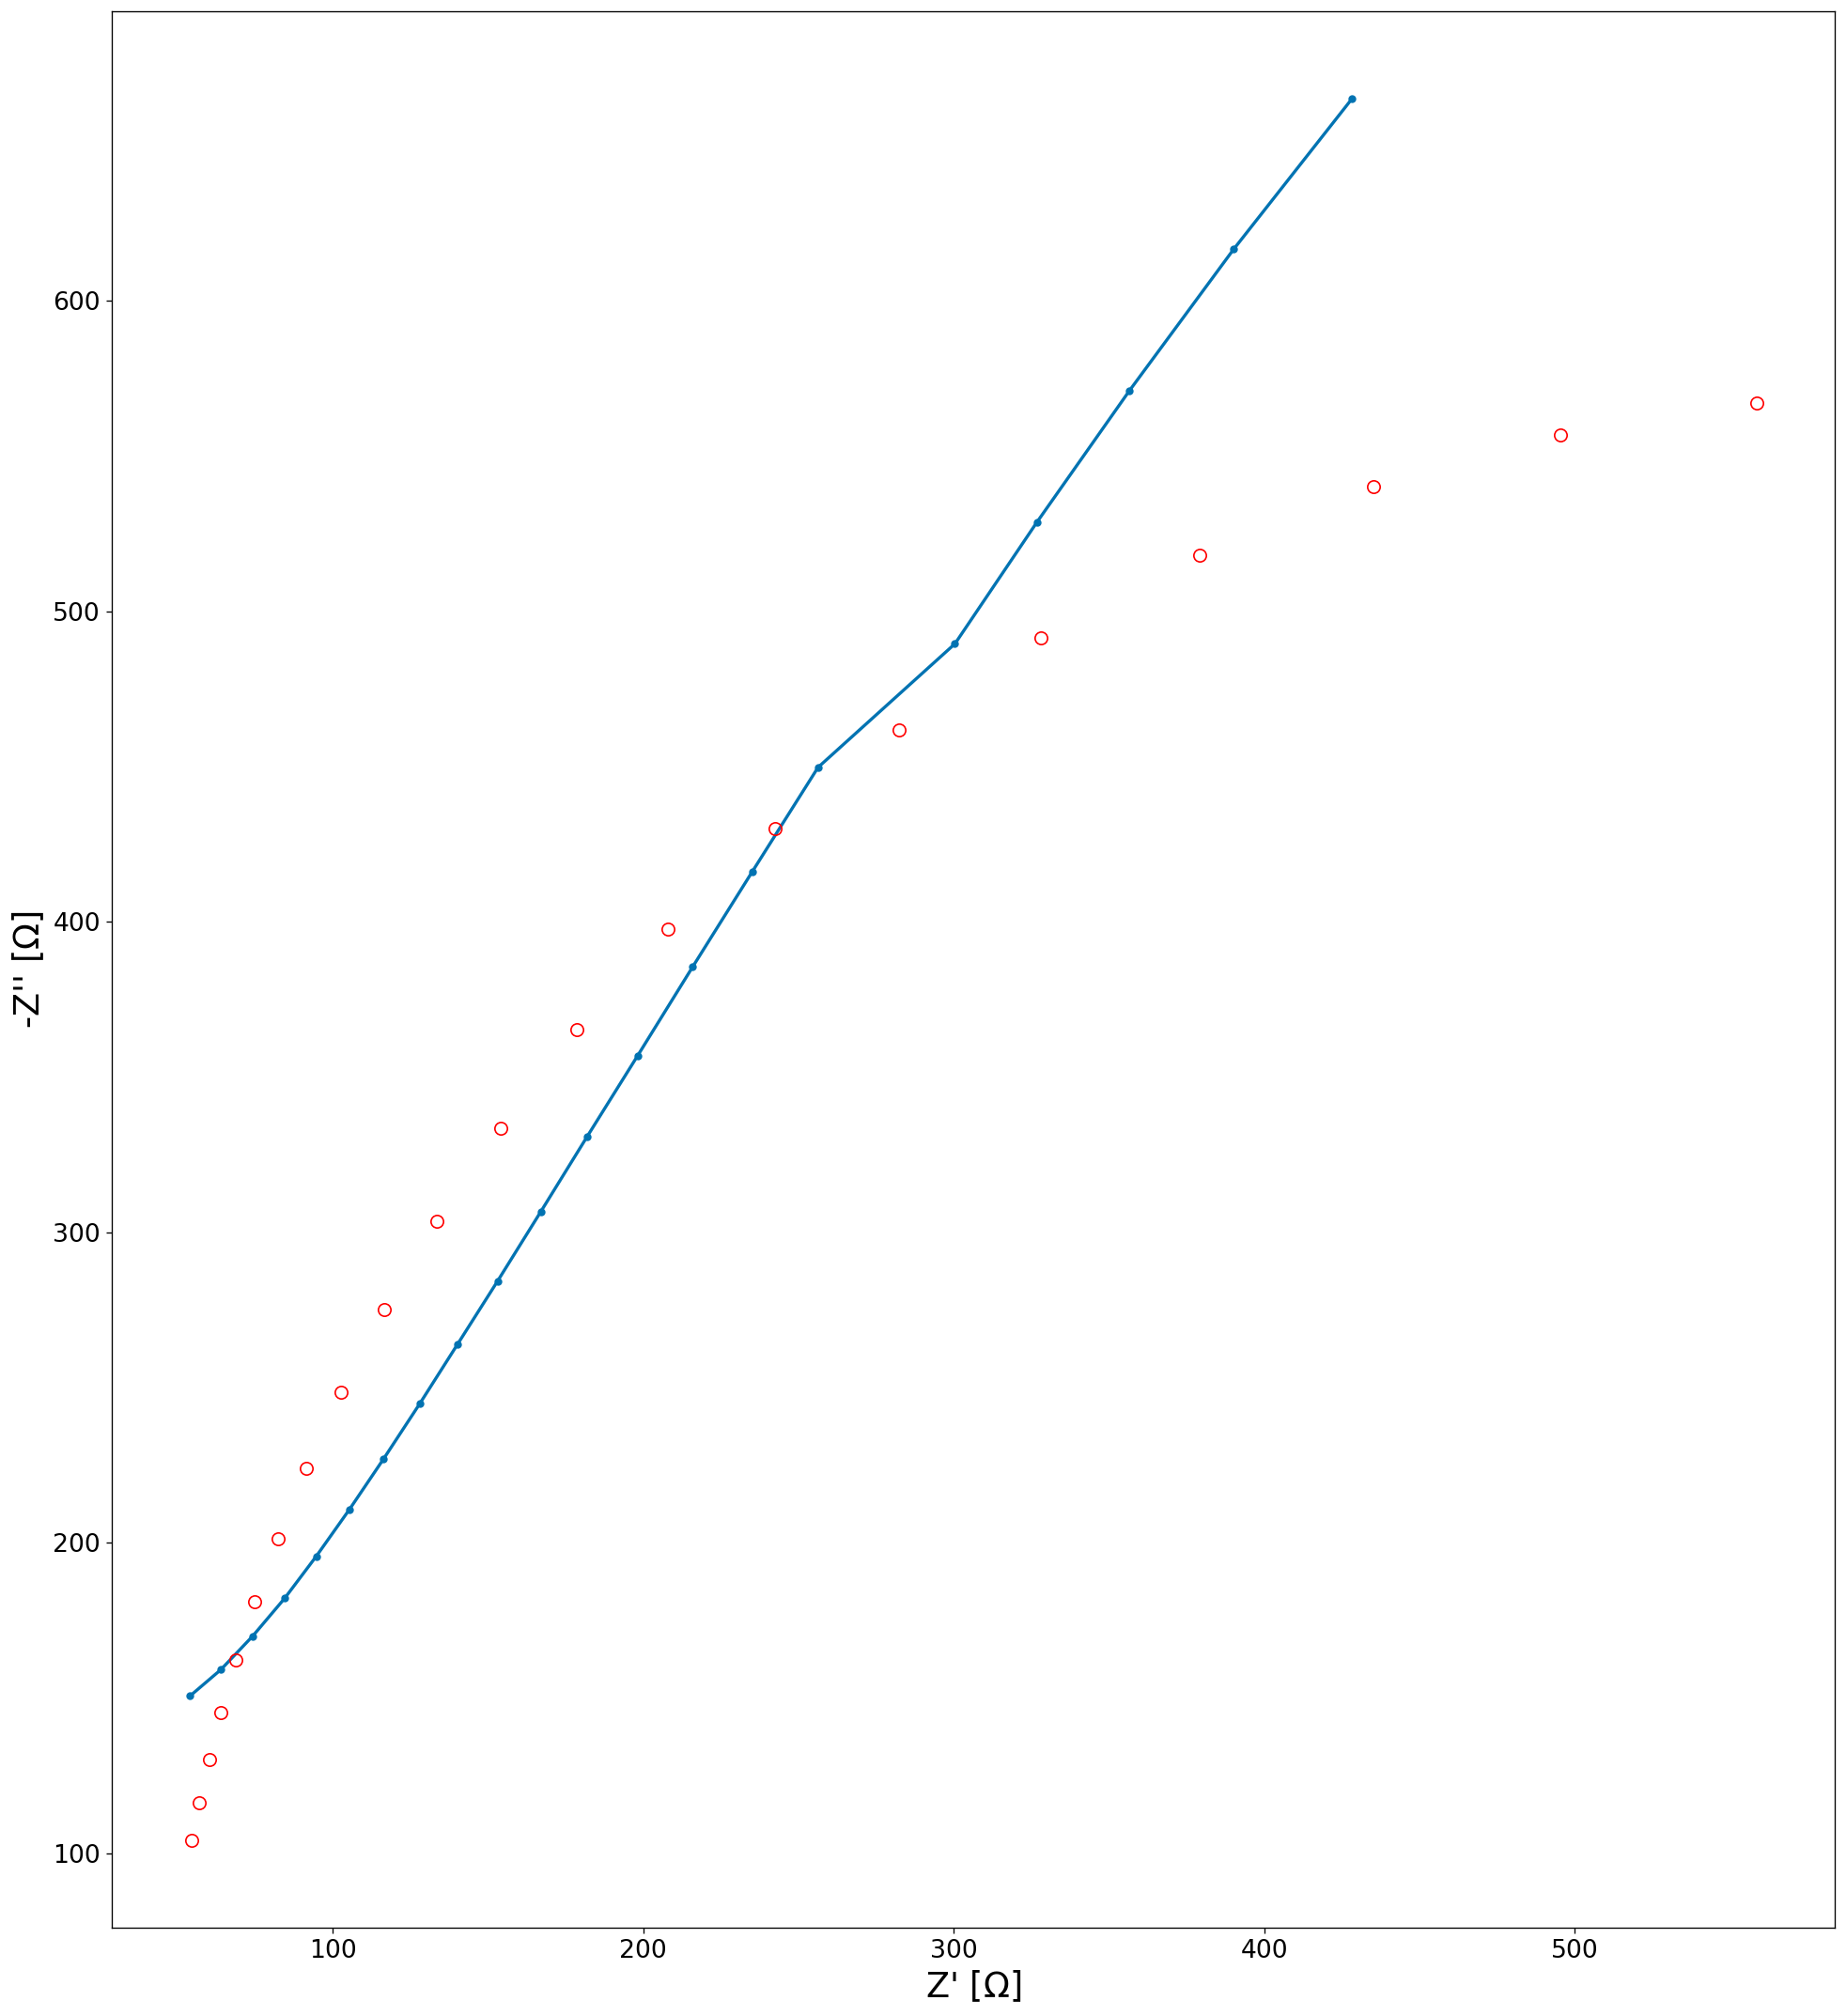

In [16]:
auto_fit(path,r"C:\Users\cjang\Desktop\impedance_data\fitted_coeffs\\", lst = second_three, take_csv = True)

No handles with labels found to put in legend.


MPT FILE :  DE_40_1_30.mpt  ERROR:  1818973.8041008615
DE_40_1_30.mpt  was a bad file, could not find a mask


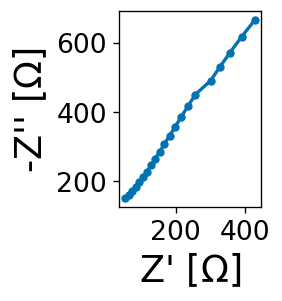

In [11]:
auto_fit(path,csv_container = r"C:\Users\cjang\Desktop\impedance_data\fitted_coeffs\\", lst = ['DE_40_1_30.mpt'], take_csv = True)

C:\Users\cjang\Desktop\impedance_data\python_notebooks\utils\tools.py:2119: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  c = c.ix[c[cols] > 0]
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


DE_40_10_60.mpt  has already been fitted!!
DE_40_11_60.mpt  has already been fitted!!
DE_40_12_60.mpt  has already been fitted!!
DE_40_13_60.mpt  has already been fitted!!
DE_40_14_60.mpt  has already been fitted!!
DE_40_15_60.mpt  has already been fitted!!
DE_40_1_30.mpt  has already been fitted!!
DE_40_2_60.mpt  has already been fitted!!
DE_40_3_60.mpt  has already been fitted!!
DE_40_4_60.mpt  has already been fitted!!
DE_40_5_60.mpt  has already been fitted!!
DE_40_6_60.mpt  has already been fitted!!
DE_40_7_60.mpt  has already been fitted!!
DE_40_8_60.mpt  was a bad file, could not find a mask
DE_40_9_60.mpt  has already been fitted!!
DE_49_1_30.mpt  has already been fitted!!
DE_49_2_30.mpt  was a bad file, could not find a mask


No handles with labels found to put in legend.


DE_49_3_30.mpt  was a bad file, could not find a mask
DE_49_4_30.mpt  was a bad file, could not find a mask
DE_49_5_30.mpt  has already been fitted!!
DE_49_6_30.mpt  has already been fitted!!
DE_49_7_30.mpt  has already been fitted!!
DE_49_8_30.mpt  has already been fitted!!
DE_49_9_30.mpt  has already been fitted!!


TypeError: 'NoneType' object is not iterable

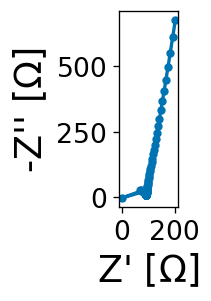

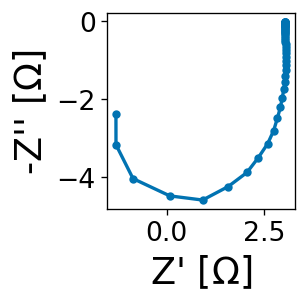

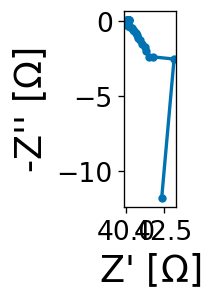

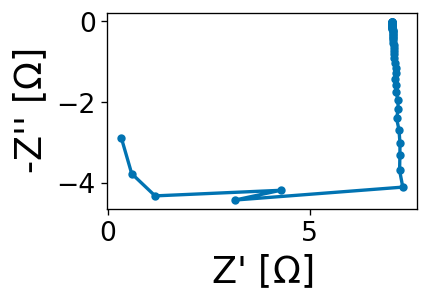

In [11]:
auto_fit(path,csv_container = r"C:\Users\cjang\Desktop\impedance_data\fitted_coeffs\\", take_csv = True)